# Import Necessary Library

In [1]:
import pandas as pd
pd.set_option("max_columns",None)
pd.set_option("max_rows",None)

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["font.serif"] = "Times New Roman"
import seaborn as sns
import plotly.express as px

import datetime as dt

# Import Data Set

In [2]:
df = pd.read_csv("Online_Retail.csv",parse_dates=["InvoiceDate"])

# Data Understanding

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#check summary statistic
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [6]:
#check data unique
for x in df.columns:
    print(f"unique for col {x}")
    print(f"Jumlah Unique {df[x].nunique()}")
    print(f"{df[x].unique()}")
    print("\n")

unique for col InvoiceNo
Jumlah Unique 25900
['536365' '536366' '536367' ... '581585' '581586' '581587']


unique for col StockCode
Jumlah Unique 4070
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']


unique for col Description
Jumlah Unique 4223
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


unique for col Quantity
Jumlah Unique 722
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240

Based on unik value, we can get some information : <br>
1.We have 4372 unique customers. <br>
2.For quantity, there are some value less than 0, maybe these happened because some product have canceled. <br>
3.We need to filter for quantity more than 0. <br>
4.We need to filter data in range date <2011-12-09, because we want to analyze data with completed month. <br>
4.We don't have idea for missing values in customerID, so we need to drop it.

In [7]:
max_d = df["InvoiceDate"].max()

In [8]:
first_trx = df.groupby('CustomerID',as_index=False)["InvoiceDate"].min()
first_trx.head()

CustomerID         InvoiceDate
0     12346.0 2011-01-18 10:01:00
1     12347.0 2010-12-07 14:57:00
2     12348.0 2010-12-16 19:09:00
3     12349.0 2011-11-21 09:51:00
4     12350.0 2011-02-02 16:01:00

In [9]:
first_trx["tenure"] = (max_d-first_trx["InvoiceDate"]).dt.days//30
first_trx.head()

CustomerID         InvoiceDate  tenure
0     12346.0 2011-01-18 10:01:00      10
1     12347.0 2010-12-07 14:57:00      12
2     12348.0 2010-12-16 19:09:00      11
3     12349.0 2011-11-21 09:51:00       0
4     12350.0 2011-02-02 16:01:00      10

In [10]:
#drop customerID with nan values
#filter data for quantity less than 0
data = df.copy()
data = data.dropna().reset_index(drop=True)
data = data.loc[(data["Quantity"]>0)]
data = data.loc[(data["InvoiceDate"]<"2011-12-01")]
data  = data.loc[data["UnitPrice"]>0]
print(data.shape)
print("\n")
data.head()

(380580, 8)




InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [11]:
#filter data in stock code BANK CHARGES,DOT,C2,POST,M,PADS
data = data[~data["StockCode"].isin(["BANK CHARGES","DOT","C2","M","POST","PADS"])]
data.shape

(379095, 8)

In [12]:
100*(data.isnull().sum()/len(data))

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

after we filter the data, now we have 379095

In [13]:
#data = data.merge(first_trx[["CustomerID","tenure"]],how="left",on="CustomerID")
#data.head()

# Feature Engineering

In [14]:
#calculate total purchase
data["TotalSales"] = data["Quantity"]*data["UnitPrice"]
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34

In [15]:
#extract year,month,days and hours
data['year']  = data["InvoiceDate"].dt.year
data["months"] = data["InvoiceDate"].dt.month
data["days"] = data['InvoiceDate'].dt.day
data["weekdays"] = [x.strftime('%A') for x in data["InvoiceDate"]]
data["hours"] = data["InvoiceDate"].dt.hour
data["quarter"] = data.InvoiceDate.dt.quarter
data["InvoiceYearMonth"] = data["InvoiceDate"].apply(lambda x :x.strftime('%b-%Y'))

data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   year  months  days   weekdays  hours  quarter InvoiceYearMonth  
0  2010      12     1  Wednesday      8        4         Dec-2010  
1  2010      12     1  Wednesday      8        4         Dec-2010  
2  2010      12     1  Wednesday      8        4         Dec-2010  
3  2010      12     1  Wednesday      8        4         Dec-2010  
4  2010      12     1  Wednesday      8        4         Dec-2010

# Analysis

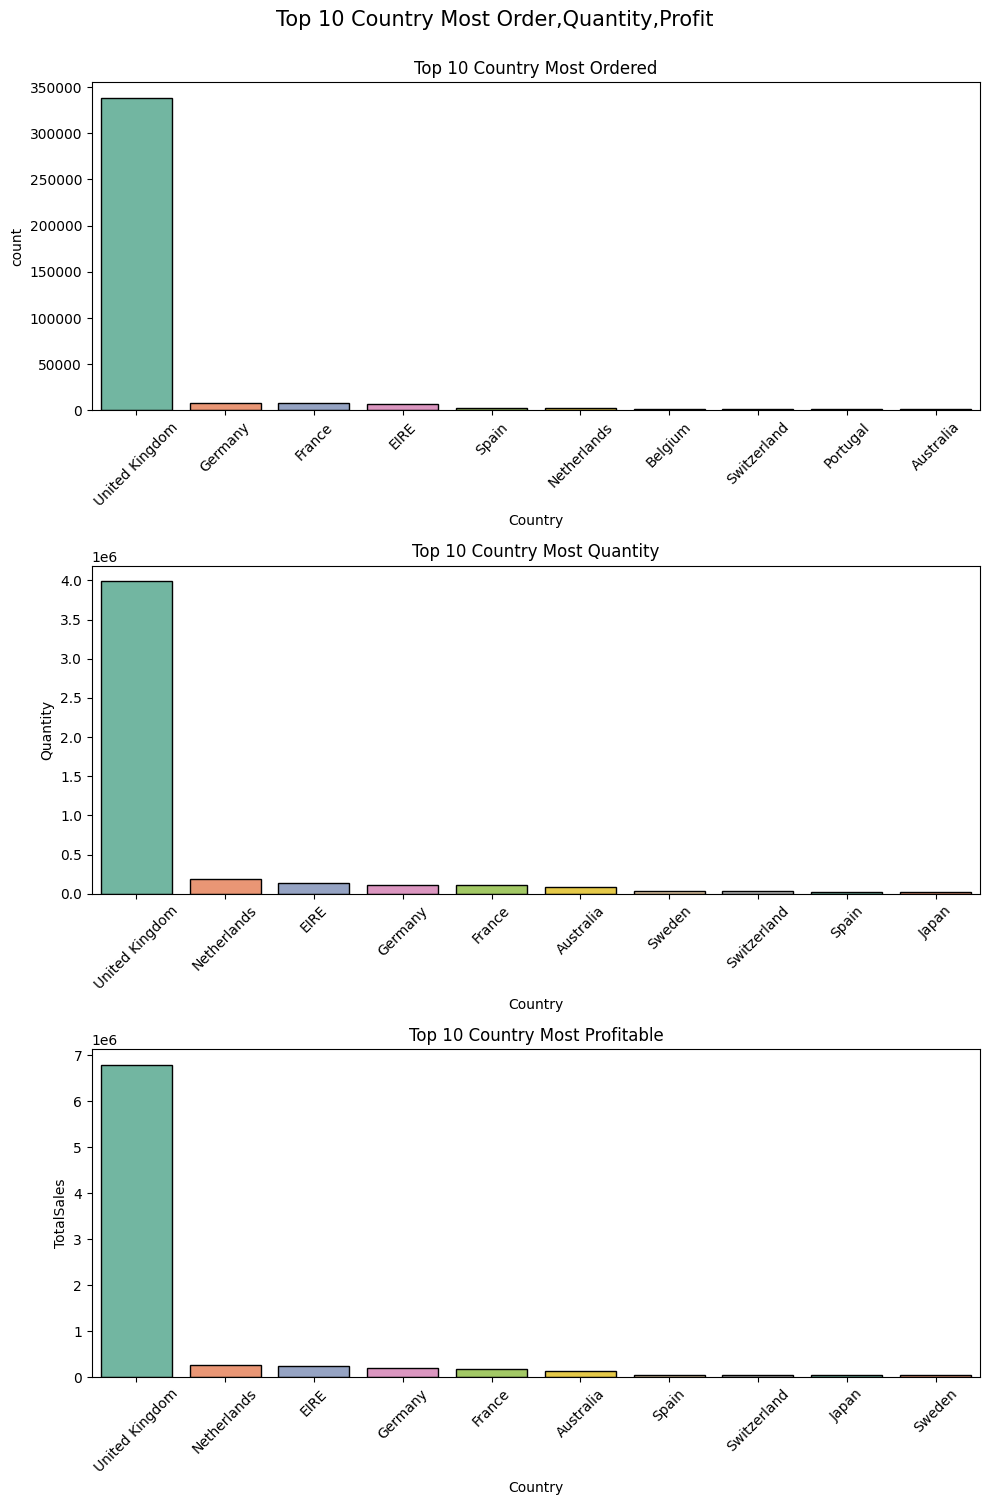

In [16]:
#what country which have high purchase
plt.figure(figsize=(10,15),dpi=100)
plt.suptitle("Top 10 Country Most Order,Quantity,Profit",fontsize=15,y=1)

plt.subplot(311)
country = data.groupby("Country",as_index=False)["Country"].size().sort_values("size",ascending=False).head(10)
sns.barplot(data=country, x="Country",y="size",palette="Set2",edgecolor='k')
plt.title("Top 10 Country Most Ordered",fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("count")

plt.subplot(312)
order = data.groupby('Country',as_index=False)['Quantity'].sum().sort_values("Quantity",ascending=False).head(10)
sns.barplot(data=order, x="Country",y="Quantity",palette="Set2",edgecolor='k')
plt.title("Top 10 Country Most Quantity",fontsize=12)
plt.xticks(rotation=45)

plt.subplot(313)
profit = data.groupby('Country',as_index=False)['TotalSales'].sum().sort_values("TotalSales",ascending=False).head(10)
sns.barplot(data=profit, x="Country",y="TotalSales",palette="Set2",edgecolor='k')
plt.title("Top 10 Country Most Profitable",fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

dari 10 negara yang memiliki frekuensi pembelian,pemesanan terbanyak dan paling menguntungkan adalah negara **United Kingdom** sehingga analisis akan berfokus pada negara **United Kingdom**

In [17]:
df_uk = data[data["Country"]=="United Kingdom"]
df_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   year  months  days   weekdays  hours  quarter InvoiceYearMonth  
0  2010      12     1  Wednesday      8        4         Dec-2010  
1  2010      12     1  Wednesday      8        4         Dec-2010  
2  2010      12     1  Wednesday      8        4         Dec-2010  
3  2010      12     1  Wednesday      8        4         Dec-2010  
4  2010      12     1  Wednesday      8        4         Dec-2010

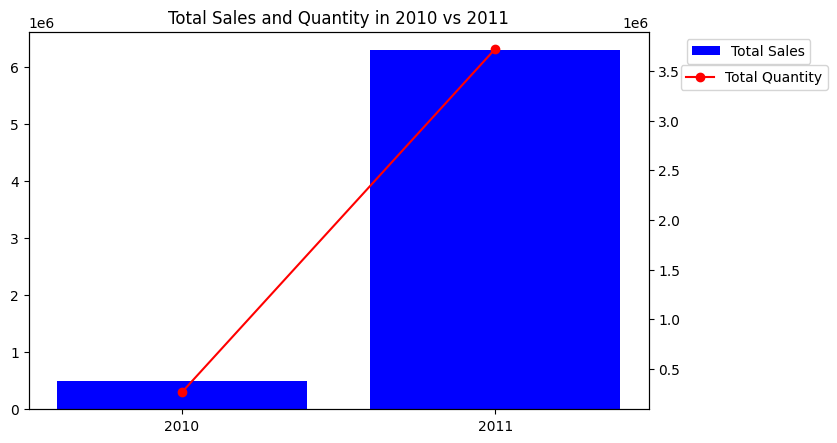

In [18]:
#analisis pertumbuhan quantity dan TotalPurchase dari tahun ke tahun
qt = df_uk.groupby("year",as_index=False)[["Quantity","TotalSales"]].sum()
fig = plt.figure(figsize=(8,5),dpi=100)
ax1 = plt.subplot(111)
ax1.bar(qt.year,qt.TotalSales,color="blue",label="Total Sales")
plt.xticks(qt.year)
ax2 = ax1.twinx()
ax2.plot(qt.year,qt.Quantity,marker="o",color='r',label='Total Quantity')

plt.title("Total Sales and Quantity in 2010 vs 2011")
ax1.legend(loc='best', bbox_to_anchor=(1.05, 0.5, 0., 0.5))
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.5, 0., 0.43))
plt.show()

Terjadi peningkatan total quantity dan total sales dari tahun 2010 ke tahun 2011

In [19]:
import waterfall_chart

In [20]:
order = ['Dec-2010', 'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011',
       'May-2011', 'Jun-2011', 'Jul-2011', 'Aug-2011', 'Sep-2011',
       'Oct-2011', 'Nov-2011']
total_sales = df_uk.groupby("InvoiceYearMonth")['TotalSales'].sum().loc[order].reset_index()
total_sales["diff_totalsales"] = total_sales["TotalSales"].diff()
total_sales['diff_totalsales'] = total_sales["diff_totalsales"].fillna(0)
total_sales["monthly_growth"] = round(total_sales["TotalSales"].pct_change(),2)
total_sales["monthly_growth"] = total_sales["monthly_growth"].fillna(0)
total_sales

InvoiceYearMonth  TotalSales  diff_totalsales  monthly_growth
0          Dec-2010   498353.68             0.00            0.00
1          Jan-2011   442080.66        -56273.02           -0.11
2          Feb-2011   355500.99        -86579.67           -0.20
3          Mar-2011   466651.52        111150.53            0.31
4          Apr-2011   406830.58        -59820.94           -0.13
5          May-2011   542876.56        136045.98            0.33
6          Jun-2011   524067.35        -18809.21           -0.03
7          Jul-2011   484289.76        -39777.59           -0.08
8          Aug-2011   495242.66         10952.90            0.02
9          Sep-2011   791256.20        296013.54            0.60
10         Oct-2011   815103.05         23846.85            0.03
11         Nov-2011   973277.41        158174.36            0.19

<Figure size 1440x1440 with 0 Axes>

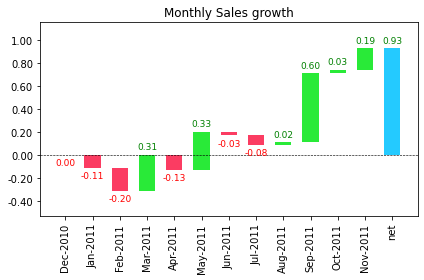

In [21]:
%matplotlib inline
plt.figure(figsize=(20,20))
waterfall_chart.plot(total_sales['InvoiceYearMonth'], total_sales['monthly_growth'],rotation_value=90,
                    formatting='{:,.2f}')
plt.title("Monthly Sales growth")
plt.tight_layout()

pertumbuhan persentase total sales dari bulan ke bulan menunjukkan terjadi pertumbuhan yang fluktuatif dari bulan desember 2010 hingga july 2011, kemudian mengalami trend meningkat dari bulan agustus 2011 hingga november 2011. pertumbuhan tertinggi terjadi pada bulan september 2011 dengan persentase peningkatan 60% dari bulan sebelumnya

In [22]:
order = ['Dec-2010', 'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011',
       'May-2011', 'Jun-2011', 'Jul-2011', 'Aug-2011', 'Sep-2011',
       'Oct-2011', 'Nov-2011']
total_quantity = df_uk.groupby("InvoiceYearMonth")['Quantity'].sum().loc[order].reset_index()
total_quantity["diff_quantity"] = total_quantity["Quantity"].diff()
total_quantity['diff_quantity'] = total_quantity["diff_quantity"].fillna(0)
total_quantity["monthly_growth"] = round(total_quantity["Quantity"].pct_change(),2)
total_quantity["monthly_growth"] = total_quantity["monthly_growth"].fillna(0)
total_quantity

InvoiceYearMonth  Quantity  diff_quantity  monthly_growth
0          Dec-2010    267569            0.0            0.00
1          Jan-2011    278210        10641.0            0.04
2          Feb-2011    213291       -64919.0           -0.23
3          Mar-2011    276218        62927.0            0.30
4          Apr-2011    260346       -15872.0           -0.06
5          May-2011    301803        41457.0            0.16
6          Jun-2011    280931       -20872.0           -0.07
7          Jul-2011    303500        22569.0            0.08
8          Aug-2011    310791         7291.0            0.02
9          Sep-2011    454016       143225.0            0.46
10         Oct-2011    475727        21711.0            0.05
11         Nov-2011    567319        91592.0            0.19

<Figure size 1440x1440 with 0 Axes>

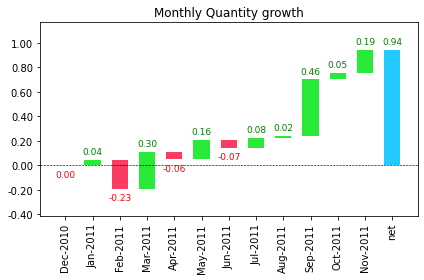

In [23]:
%matplotlib inline
plt.figure(figsize=(20,20))
waterfall_chart.plot(total_quantity['InvoiceYearMonth'], total_quantity['monthly_growth'],rotation_value=90,
                    formatting='{:,.2f}')
plt.title("Monthly Quantity growth")
plt.tight_layout()

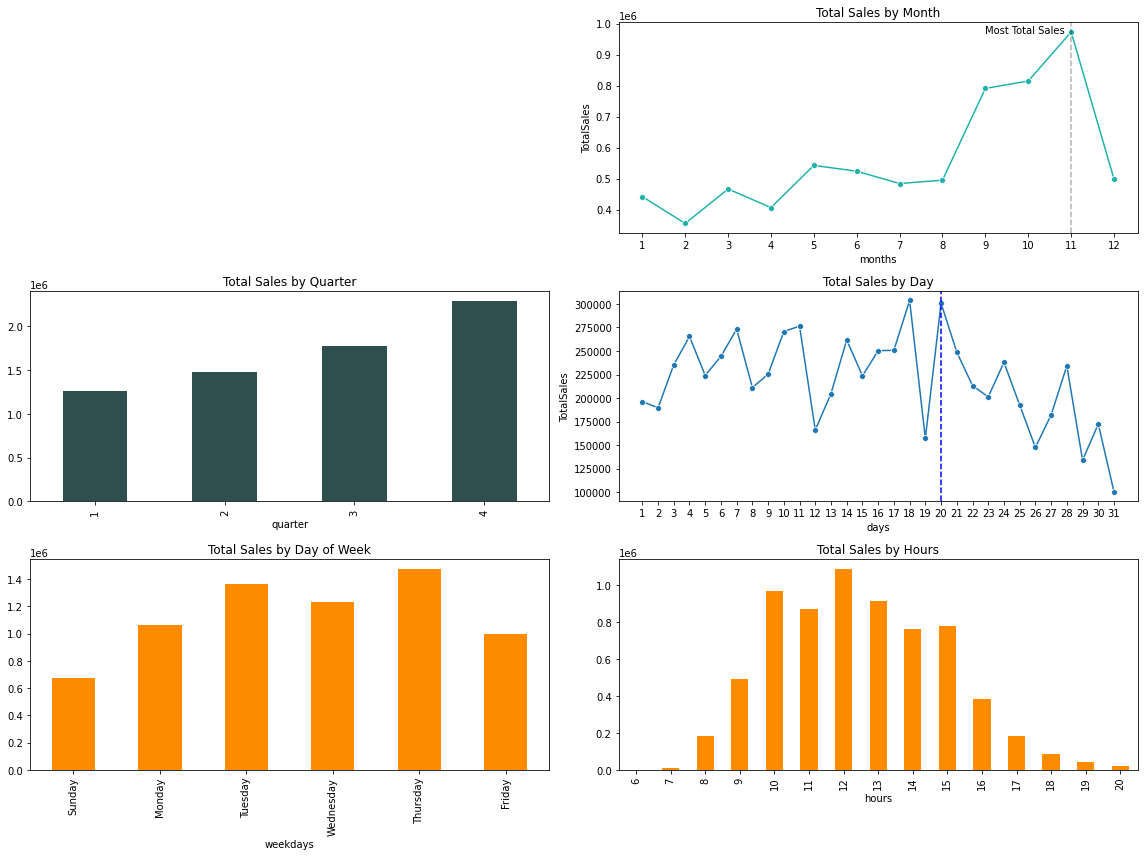

In [389]:
#Plotting the above data
plt.figure(figsize=(16,12))

plt.subplot(3,2,2)
sns.lineplot(x = "months", y = "TotalSales", data = df_uk.groupby("months").sum("TotalSales"), 
             marker = "o", color = "lightseagreen")
plt.xticks(df_uk.groupby("months").sum("TotalSales").index)
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(9, 0.97e6, "Most Total Sales")
plt.title("Total Sales by Month")

plt.subplot(3,2,3)
df_uk.groupby("quarter").sum()["TotalSales"].plot(kind = "bar", color = "darkslategrey")
plt.title("Total Sales by Quarter")

plt.subplot(3,2,4)
sns.lineplot(x = "days", y = "TotalSales", data = df_uk.groupby("days").sum("TotalSales"), marker = "o", )
plt.xticks(df_uk.groupby("days").sum("TotalSales").index)
plt.axvline(x=20,linestyle="--",color='blue')
plt.title("Total Sales by Day")

plt.subplot(3,2,5)
order = ['Sunday', 'Monday','Tuesday','Wednesday', 'Thursday', 'Friday',]
df_uk.groupby("weekdays").sum()["TotalSales"].loc[order].plot(kind = "bar", color = "darkorange")
plt.title("Total Sales by Day of Week")

plt.subplot(3,2,6)
df_uk.groupby("hours").sum()["TotalSales"].plot(kind = "bar", color = "darkorange")
plt.title("Total Sales by Hours")

plt.tight_layout()
plt.show()

1.Pertumbuhan sales meningkat secara significant setelah di atas bulan ke-8 dan puncak peningkat sales terjadi pada bulan 11. <br>

2.Pertumbuhan sales tiap quarter menunjukkan trend yang meningkat. <br>

3.Analisis total sales berdasarkan tanggal, total sales mengalami pertumbuhan yang fluktuatif hingga tanggal 20, dan mengalami pertumbuhan yang menurun setelahnya. <br>

4.pertumbuhan sales berdasarkan hari, total sales memiliki trend meningkat dari hari minggu hingga hari kamis, dan mengalami penurunan pada hari jumat. <br>

5.berdasarkan jam, total sales meningkat dari jam 7 pagi hingga memuncak pada jam 12 siang kemudian mengalami trend penurunan setelah jam 12 siang. menunjukkan jam terbaik untuk berjualan adalah pagi hingga siang hari

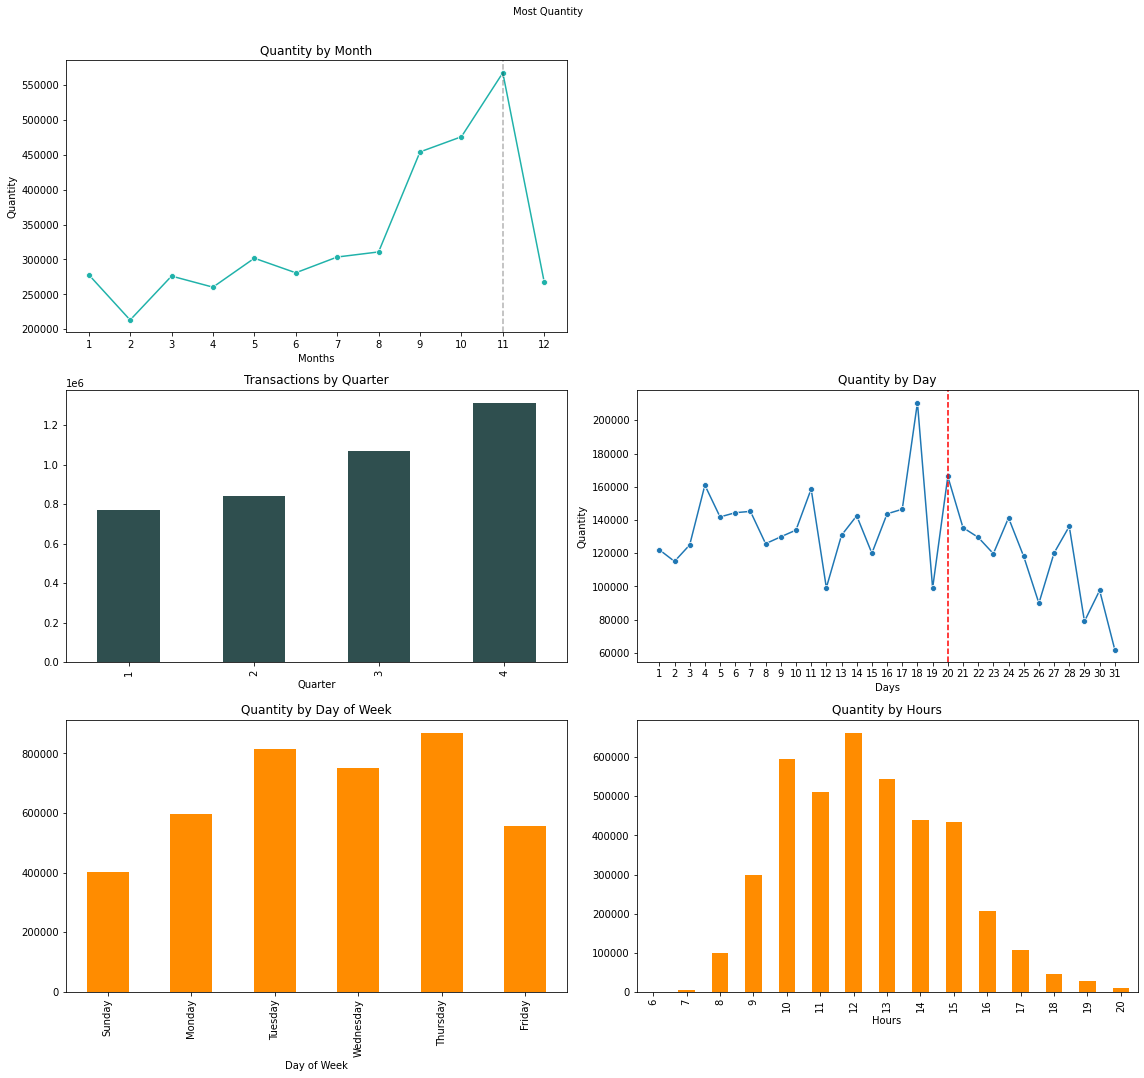

In [25]:

plt.figure(figsize=(16,15))

plt.subplot(3,2,1)
sns.lineplot(x = "months", y = "Quantity", data = df_uk.groupby("months").sum("Quantity"),
             marker = "o", color = "lightseagreen")
plt.xlabel("Months",fontsize=10)
plt.xticks(df_uk.groupby("months").sum("Quantity").index,fontsize=10)
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(11.25, 649999, "Most Quantity")
plt.title("Quantity by Month")


plt.subplot(3,2,3)
df_uk.groupby("quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.xlabel("Quarter",fontsize=10)
plt.xticks(fontsize=10)

plt.subplot(3,2,4)
sns.lineplot(x = "days", y = "Quantity", data = df_uk.groupby("days").sum("Quantity"), marker = "o", )
plt.xticks(df_uk.groupby("days").sum("Quantity").index)
plt.axvline(20, color = 'r', linestyle = '--')
plt.title("Quantity by Day")
plt.xlabel("Days",fontsize=10)
plt.xticks(fontsize=10)

plt.subplot(3,2,5)
order = ['Sunday', 'Monday','Tuesday','Wednesday', 'Thursday', 'Friday',]
df_uk.groupby("weekdays").sum()["Quantity"].loc[order].plot(kind = "bar", color = "darkorange")
plt.title("Quantity by Day of Week")
plt.xlabel("Day of Week",fontsize=10)
plt.xticks(fontsize=10)


plt.subplot(3,2,6)
df_uk.groupby("hours").sum()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Quantity by Hours")
plt.xlabel('Hours',fontsize=10)
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()

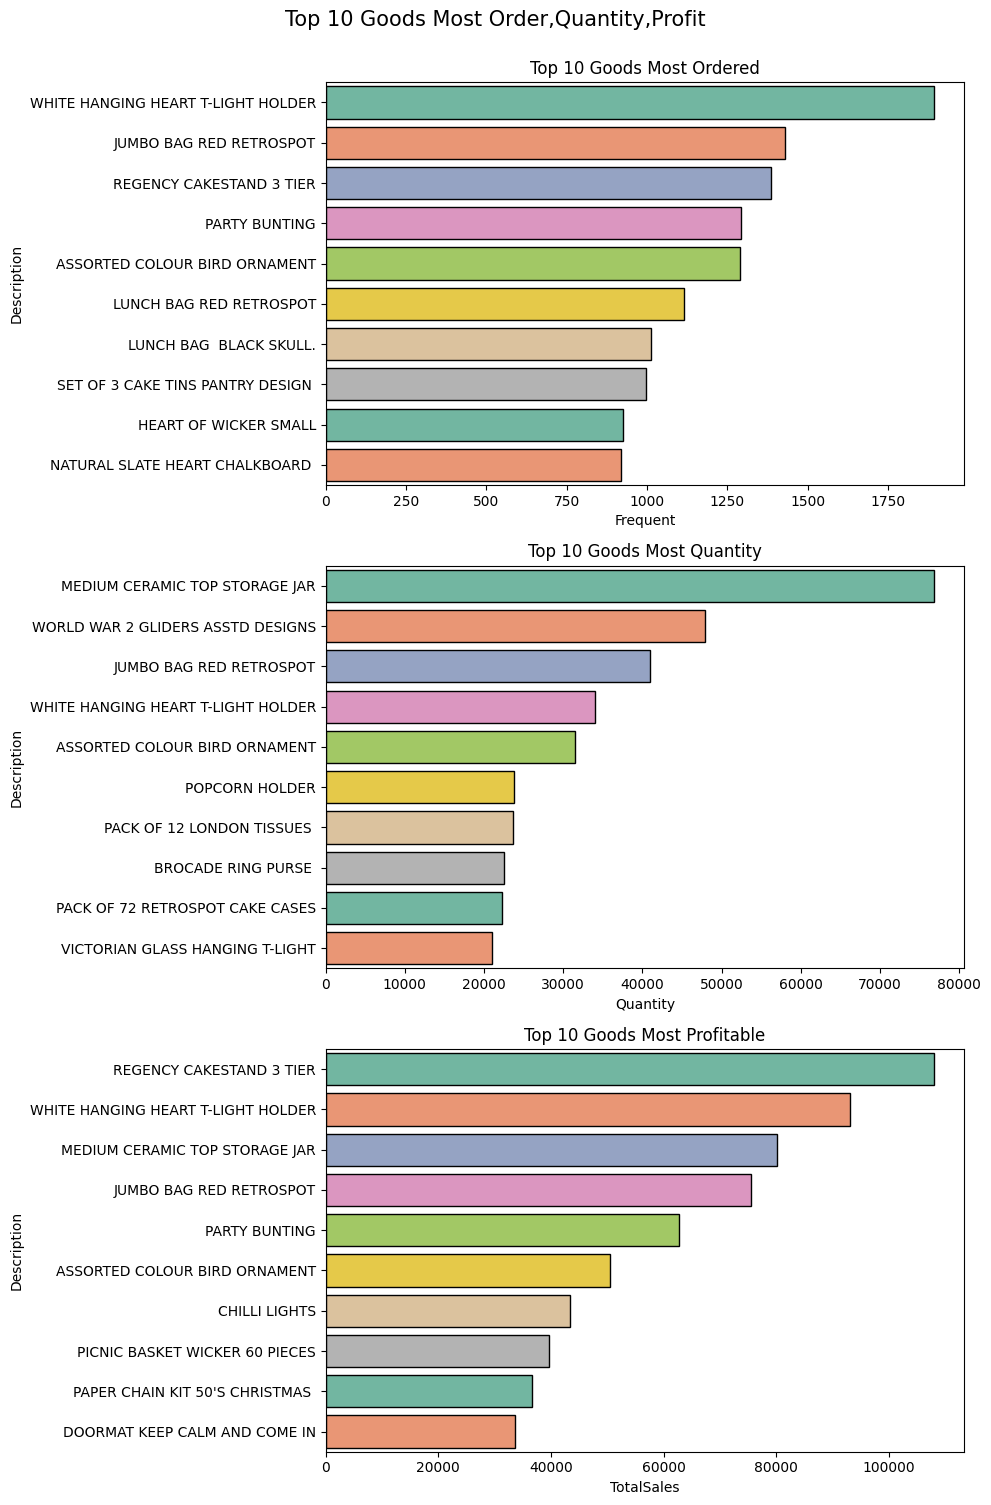

In [26]:
#analisis barang yang sering dibeli,memiliki quantiti terbanyak dan profit
plt.figure(figsize=(10,15),dpi=100)
plt.suptitle("Top 10 Goods Most Order,Quantity,Profit",fontsize=15,y=1)

plt.subplot(311)
country = df_uk.groupby("Description",as_index=False)["Description"].size().sort_values("size",ascending=False).head(10)
sns.barplot(data=country, y="Description",x="size",palette="Set2",edgecolor='k')
plt.title("Top 10 Goods Most Ordered",fontsize=12)
plt.xlabel("Frequent")


plt.subplot(312)
order = df_uk.groupby('Description',as_index=False)['Quantity'].sum().sort_values("Quantity",ascending=False).head(10)
sns.barplot(data=order, y="Description",x="Quantity",palette="Set2",edgecolor='k')
plt.title("Top 10 Goods Most Quantity",fontsize=12)


plt.subplot(313)
profit = df_uk.groupby('Description',as_index=False)['TotalSales'].sum().sort_values("TotalSales",ascending=False).head(10)
sns.barplot(data=profit, y="Description",x="TotalSales",palette="Set2",edgecolor='k')
plt.title("Top 10 Goods Most Profitable",fontsize=12)


plt.tight_layout()
plt.show()

1.barang yang paling sering di order adalah **WHITE HANGING HEART T-LIGHT HOLDER**. <br>
2.barang yang memiliki jumlah kuantitas tertinggi adalah **MEDIUM CERAMIC TOP STORAGE JAR**. <br>
3.barang yang mendatangkan keuntangan terbesar adalag **REGENCY CAKESTAND 3 TIER**

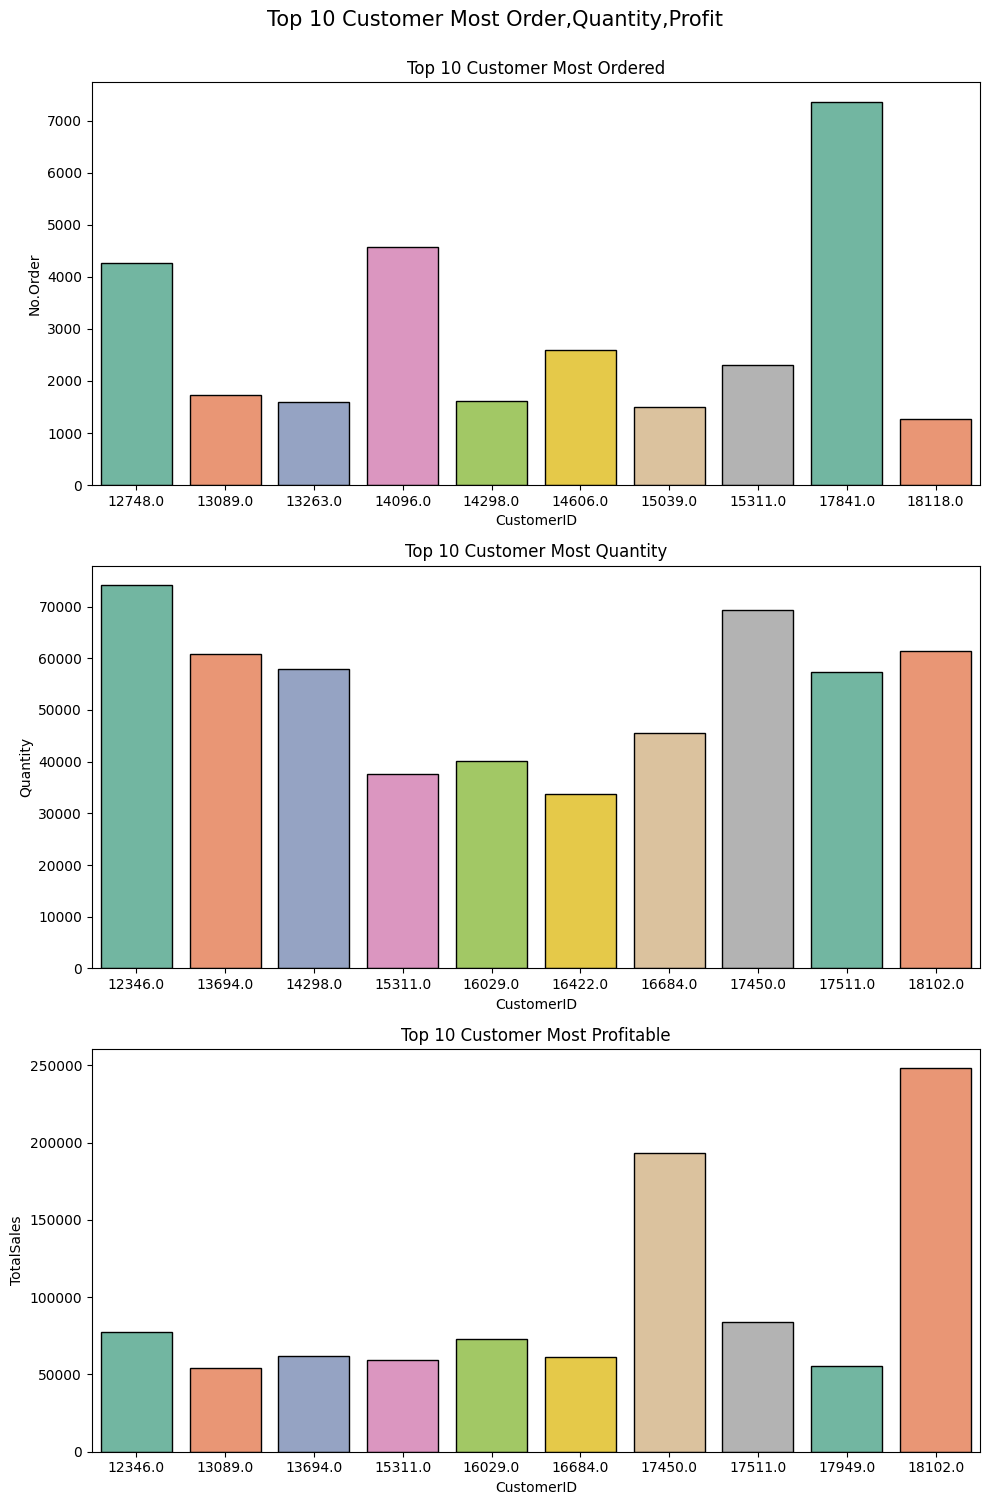

In [27]:
#analisis custoemr yang sering dibeli,memiliki quantiti terbanyak dan profit
plt.figure(figsize=(10,15),dpi=100)
plt.suptitle("Top 10 Customer Most Order,Quantity,Profit",fontsize=15,y=1)

plt.subplot(311)
csid = df_uk.groupby("CustomerID",as_index=False)["CustomerID"].size().sort_values("size",ascending=False).head(10)
sns.barplot(data=csid, x="CustomerID",y="size",palette="Set2",edgecolor='k')
plt.title("Top 10 Customer Most Ordered",fontsize=12)
plt.ylabel("No.Order")


plt.subplot(312)
order = df_uk.groupby('CustomerID',as_index=False)['Quantity'].sum().sort_values("Quantity",ascending=False).head(10)
sns.barplot(data=order, x="CustomerID",y="Quantity",palette="Set2",edgecolor='k')
plt.title("Top 10 Customer Most Quantity",fontsize=12)


plt.subplot(313)
profit = df_uk.groupby('CustomerID',as_index=False)['TotalSales'].sum().sort_values("TotalSales",ascending=False).head(10)
sns.barplot(data=profit, x="CustomerID",y="TotalSales",palette="Set2",edgecolor='k')
plt.title("Top 10 Customer Most Profitable",fontsize=12)


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 10 Goods Most Cheap')

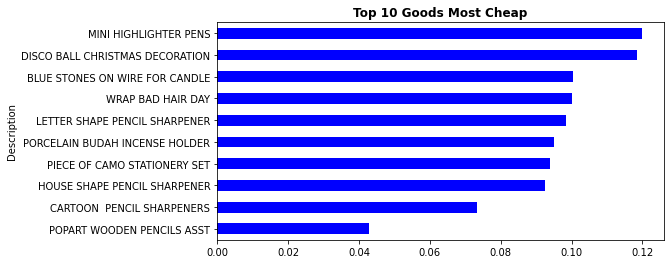

In [402]:
df_uk.groupby("Description")["UnitPrice"].mean().sort_values(axis=0,ascending=True).head(10).plot(kind="barh",figsize=(8,4),
                                                                                               color=['b','b','b','b','b'])
plt.title("Top 10 Goods Most Cheap",fontsize=12,fontweight="bold")

Text(0.5, 1.0, 'Top 10 Goods Most Expensive')

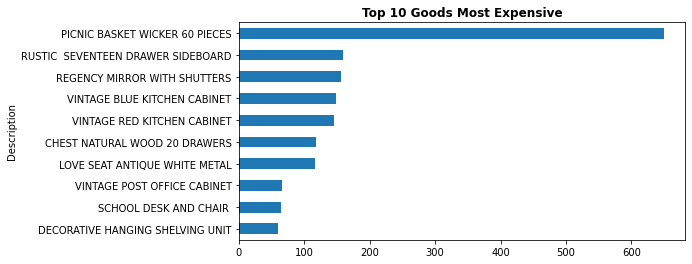

In [403]:
df_uk.groupby("Description")["UnitPrice"].mean().sort_values(axis=0,ascending=True).tail(10).plot(kind="barh",figsize=(8,4))
plt.title("Top 10 Goods Most Expensive",fontsize=12,fontweight="bold")

$\begin{align}
    &{{H}_{0}}:\,\rho =0 \\
    &{{H}_{1}}:\,\rho \ne 0 \\
    \end{align}$

In [399]:
#uji statistik korelasi quantity dan unit price

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

(Rho,p_value) = pearsonr(df_uk["Quantity"],df_uk["UnitPrice"])

print("The Pearson's Correlation Coefficient is:", '{:.2f}'.format(Rho))
print("The p-value is: ",'{:.5f}'.format(p_value))

The Pearson's Correlation Coefficient is: -0.02
The p-value is:  0.00000


In [400]:
(sprho,p_value) = spearmanr(df_uk["Quantity"],df_uk["UnitPrice"],nan_policy="omit")

print("The spearman correlation is :","{:.2f}".format(sprho))
print("The p-value is :",'{:.5f}'.format(p_value))

The spearman correlation is : -0.40
The p-value is : 0.00000


In [401]:
(tau,p_value) = kendalltau(df_uk["Quantity"],df_uk["UnitPrice"],nan_policy="omit")
print("The Kendall Coefficient correlation is:",'{:.2f}'.format(tau))
print("The p-value is:",'{:.5f}'.format(p_value))

The Kendall Coefficient correlation is: -0.30
The p-value is: 0.00000


C:\Users\hrd\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning:

overflow encountered in longlong_scalars



In [286]:
yellow  = []
green = []
red = []
blue = []
white = []
black = []

for x in df_uk['Description']:
    if "yellow" in x.lower():
        yellow.append(1)
    else :
        yellow.append(0)

for x in df_uk["Description"]:
    if "green" in x.lower():
        green.append(1)
    else :
        green.append(0)
        
for x in df_uk["Description"]:
    if "red" in x.lower():
        red.append(1)
    else :
        red.append(0)

for x in df_uk["Description"]:
    if "blue" in x.lower():
        blue.append(1)
    else :
        blue.append(0)

for x in df_uk['Description']:
    if "black" in x.lower():
        black.append(1)
    else :
        black.append(0)

for x in df_uk["Description"]:
    if "white" in x.lower():
        white.append(1)
    else :
        white.append(0)
        
#gabungkan dengan kolom ke df_uk

df_uk["yellow"] = yellow
df_uk["green"] = green
df_uk["blue"] = blue
df_uk["red"] = red
df_uk["white"] = white
df_uk["black"] = black


#mixed color
df_uk["mix"] = df_uk[['yellow',"green","blue","red","white","black"]].sum(axis=1).apply(lambda x: 1 if x > 1 else 0)

#check
df_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   year  months  days   weekdays  hours  quarter InvoiceYearMonth  yellow  \
0  2010      12     1  Wednesday      8        4         Dec-2010       0   
1  2010      12     1  Wednesday      8        4         Dec-2010       0   
2  2010      12     1  Wednesday      8        4         Dec-2010       0   
3  2010      12     1  Wednesday      8        4         Dec-2010       0   
4  2010      12     1  Wednesday      8        4         Dec-2010       0   

   green  blue  red  white  black  mix  
0      0     0    0      1      0    0  
1      0     0    0      1      0    0  
2      0     0    0      0      0    0  
3      0     0    0      0      0    0  
4      0     0    1      1      0    1

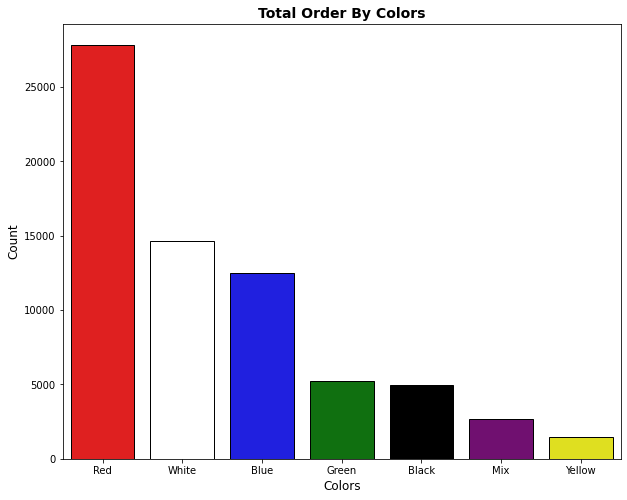

In [427]:
#calculate color most order
colors = pd.DataFrame({"Black":[df_uk["black"].sum()],
              "White":[df_uk["white"].sum()],
              "Red":[df_uk["red"].sum()],
              "Blue":[df_uk["blue"].sum()],
              "Green":[df_uk["green"].sum()],
              "Yellow":[df_uk['yellow'].sum()],
              "Mix":[df_uk["mix"].sum()]}).T.sort_values(0,ascending=False)

#rename columns
colors = colors.reset_index()

colors.columns = ["colors","OrderCount"]

#visualisasi
plt.figure(figsize=(10,8))
sns.barplot(data=colors,x="colors",y='OrderCount',palette=["r","white","b","g","k","purple","yellow"],
           edgecolor="k")
plt.title("Total Order By Colors",fontweight="bold",fontsize=14)
plt.xlabel("Colors",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

# Analisis Cancel

In [328]:
#cancel analysis
#drop customerID with nan values
#filter data for quantity less than 0
df_cancel = df.copy()
df_cancel = df_cancel.dropna().reset_index(drop=True)
df_cancel = df_cancel.loc[(df_cancel["Quantity"]<0)]
df_cancel = df_cancel.loc[(df_cancel["InvoiceDate"]<"2011-12-01")]
df_cancel  = df_cancel.loc[df_cancel["UnitPrice"]>0]
#filter data in stock code BANK CHARGES,DOT,C2,POST,M,PADS
df_cancel = df_cancel[~df_cancel["StockCode"].isin(["BANK CHARGES","DOT","C2","M","POST","PADS","D"])]
df_cancel = df_cancel.loc[df_cancel["Country"]=="United Kingdom"]
df_cancel.shape

(6996, 8)

In [329]:
#extract year,month,days and hours
df_cancel['year']  = df_cancel["InvoiceDate"].dt.year
df_cancel["months"] = df_cancel["InvoiceDate"].dt.month
df_cancel["days"] = df_cancel['InvoiceDate'].dt.day
df_cancel["weekdays"] = [x.strftime('%A') for x in df_cancel["InvoiceDate"]]
df_cancel["hours"] = df_cancel["InvoiceDate"].dt.hour
df_cancel["quarter"] = df_cancel.InvoiceDate.dt.quarter
df_cancel["InvoiceYearMonth"] = df_cancel["InvoiceDate"].apply(lambda x :x.strftime('%b-%Y'))

df_cancel.head()

InvoiceNo StockCode                        Description  Quantity  \
154   C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238   C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  year  months  \
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  2010      12   
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  2010      12   
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010      12   
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010      12   
238 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010      12   

     days   weekdays  hours  quarter InvoiceYearMonth  
154     1  Wednesday      9        4         Dec-2010  
235     1  Wednesday     10        4         Dec-2010  
236     1  Wednesday     10        4         Dec-2010  
237     1  Wednesday     10        4         Dec-2010  
238     1  Wednesday     10        4         Dec-2010

In [372]:
df_cancel['Quantity'] = df_cancel["Quantity"]*(-1)
df_cancel['TotalSales_loss'] = df_cancel["UnitPrice"]*df_cancel['Quantity']
df_cancel.head()

InvoiceNo StockCode                        Description  Quantity  \
154   C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS         1   
235   C536391     22556     PLASTERS IN TIN CIRCUS PARADE         12   
236   C536391     21984   PACK OF 12 PINK PAISLEY TISSUES         24   
237   C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES         24   
238   C536391     21980  PACK OF 12 RED RETROSPOT TISSUES         24   

            InvoiceDate  UnitPrice  CustomerID         Country  year  months  \
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  2010      12   
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  2010      12   
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010      12   
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010      12   
238 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010      12   

     days   weekdays  hours  quarter InvoiceYearMonth  TotalSales_loss  
154     1  Wednesday      9        4         Dec-2010             4.65  
235     1  Wednesday     10        4         Dec-2010            19.80  
236     1  Wednesday     10        4         Dec-2010             6.96  
237     1  Wednesday     10        4         Dec-2010             6.96  
238     1  Wednesday     10        4         Dec-2010             6.96

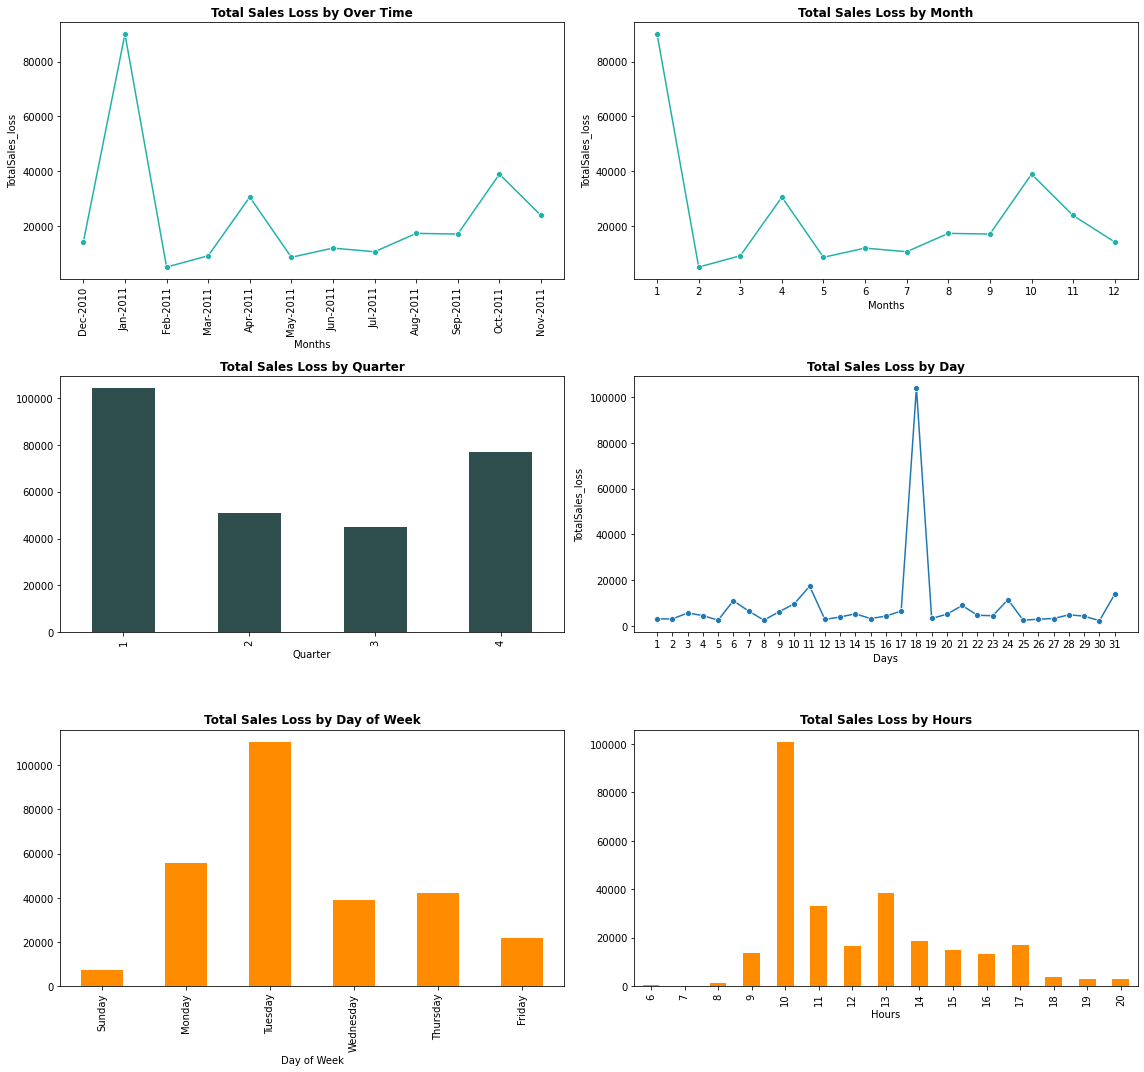

In [373]:
plt.figure(figsize=(16,15))


plt.subplot(3,2,1)
order = ['Dec-2010', 'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011',
       'May-2011', 'Jun-2011', 'Jul-2011', 'Aug-2011', 'Sep-2011',
       'Oct-2011', 'Nov-2011']

sns.lineplot(x = "InvoiceYearMonth", y = "TotalSales_loss", data = df_cancel.groupby("InvoiceYearMonth") \
             .sum("TotalSales_loss").loc[order],
             marker = "o", color = "lightseagreen")
plt.xlabel("Months",fontsize=10)
#plt.xticks(df_cancel.groupby("InvoiceYearMonth").sum("TotalSales_loss").index,fontsize=10,rotation=90)
plt.xticks(rotation=90)
plt.title("Total Sales Loss by Over Time",fontweight="bold")


plt.subplot(3,2,2)
sns.lineplot(x = "months", y = "TotalSales_loss", data = df_cancel.groupby("months").sum("TotalSales_loss"),
             marker = "o", color = "lightseagreen")
plt.xlabel("Months",fontsize=10)
plt.xticks(df_cancel.groupby("months").sum("TotalSales_loss").index,fontsize=10)
plt.title("Total Sales Loss by Month",fontweight="bold")



plt.subplot(3,2,3)
df_cancel.groupby("quarter").sum()["TotalSales_loss"].plot(kind = "bar", color = "darkslategrey")
plt.title("Total Sales Loss by Quarter",fontweight="bold")
plt.xlabel("Quarter",fontsize=10)
plt.xticks(fontsize=10)

plt.subplot(3,2,4)
sns.lineplot(x = "days", y = "TotalSales_loss", data = df_cancel.groupby("days").sum("TotalSales_loss"), marker = "o", )
plt.xticks(df_cancel.groupby("days").sum("TotalSales_loss").index)
plt.title("Total Sales Loss by Day",fontweight="bold")
plt.xlabel("Days",fontsize=10)
plt.xticks(fontsize=10)

plt.subplot(3,2,5)
weeks = ['Sunday', 'Monday','Tuesday','Wednesday', 'Thursday', 'Friday',]
df_cancel.groupby("weekdays").sum()["TotalSales_loss"].loc[weeks].plot(kind = "bar", color = "darkorange")
plt.title("Total Sales Loss by Day of Week",fontweight="bold")
plt.xlabel("Day of Week",fontsize=10)
plt.xticks(fontsize=10)


plt.subplot(3,2,6)
df_cancel.groupby("hours").sum()["TotalSales_loss"].plot(kind = "bar", color = "darkorange")
plt.title("Total Sales Loss by Hours",fontweight="bold")
plt.xlabel('Hours',fontsize=10)
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()

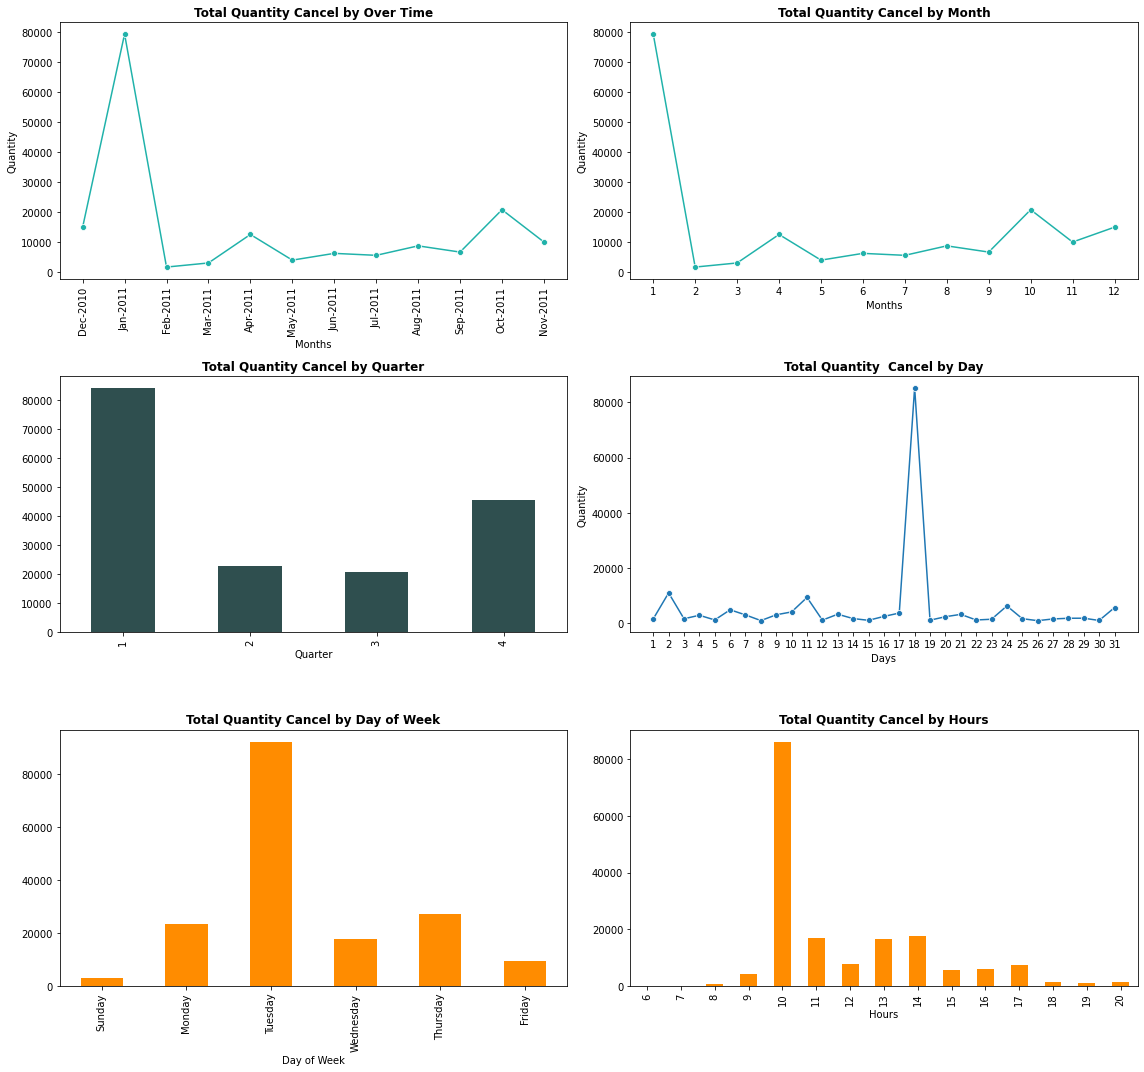

In [375]:
plt.figure(figsize=(16,15))


plt.subplot(3,2,1)
order = ['Dec-2010', 'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011',
       'May-2011', 'Jun-2011', 'Jul-2011', 'Aug-2011', 'Sep-2011',
       'Oct-2011', 'Nov-2011']
sns.lineplot(x = "InvoiceYearMonth", y = "Quantity", data = df_cancel.groupby("InvoiceYearMonth").sum("Quantity").loc[order],
             marker = "o", color = "lightseagreen")
plt.xlabel("Months",fontsize=10)
plt.xticks(fontsize=10,rotation=90)
plt.title("Total Quantity Cancel by Over Time",fontweight="bold")

plt.subplot(3,2,2)
sns.lineplot(x = "months", y = "Quantity", data = df_cancel.groupby("months").sum("Quantity"),
             marker = "o", color = "lightseagreen")
plt.xlabel("Months",fontsize=10)
plt.xticks(df_cancel.groupby("months").sum("Quantity").index,fontsize=10)
plt.title("Total Quantity Cancel by Month",fontweight="bold")



plt.subplot(3,2,3)
df_cancel.groupby("quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Total Quantity Cancel by Quarter",fontweight="bold")
plt.xlabel("Quarter",fontsize=10)
plt.xticks(fontsize=10)

plt.subplot(3,2,4)
sns.lineplot(x = "days", y = "Quantity", data = df_cancel.groupby("days").sum("Quantity"), marker = "o", )
plt.xticks(df_cancel.groupby("days").sum("Quantity").index)
plt.title("Total Quantity  Cancel by Day",fontweight="bold")
plt.xlabel("Days",fontsize=10)
plt.xticks(fontsize=10)

plt.subplot(3,2,5)
weeks = ['Sunday', 'Monday','Tuesday','Wednesday', 'Thursday', 'Friday',]
df_cancel.groupby("weekdays").sum()["Quantity"].loc[weeks].plot(kind = "bar", color = "darkorange")
plt.title("Total Quantity Cancel by Day of Week",fontweight="bold")
plt.xlabel("Day of Week",fontsize=10)
plt.xticks(fontsize=10)


plt.subplot(3,2,6)
df_cancel.groupby("hours").sum()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Total Quantity Cancel by Hours",fontweight="bold")
plt.xlabel('Hours',fontsize=10)
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()

In [361]:
cancel_rate  = (df_cancel.groupby("InvoiceYearMonth")["CustomerID"].count().loc[order]/len(df_uk) * 100)
cancel_rate = cancel_rate.reset_index()
cancel_rate.columns = ['YearMonth',"CancelRate"]
cancel_rate

YearMonth  CancelRate
0   Dec-2010    0.171204
1   Jan-2011    0.168247
2   Feb-2011    0.099647
3   Mar-2011    0.161446
4   Apr-2011    0.141635
5   May-2011    0.150505
6   Jun-2011    0.166177
7   Jul-2011    0.159080
8   Aug-2011    0.144592
9   Sep-2011    0.198111
10  Oct-2011    0.255770
11  Nov-2011    0.252222

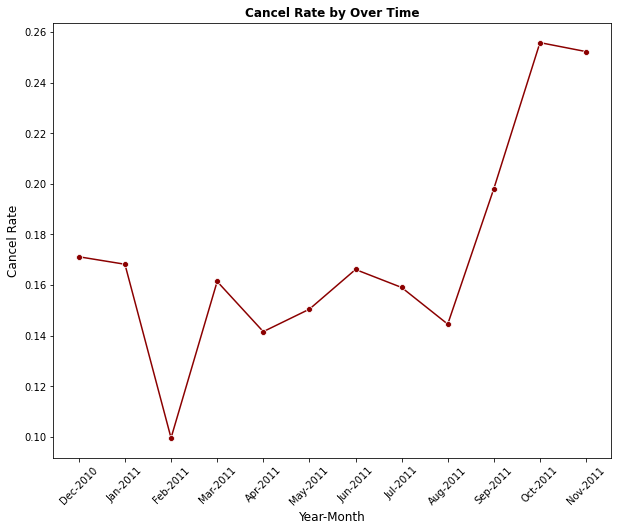

In [371]:
plt.figure(figsize=(10,8))
sns.lineplot(x = "YearMonth", y = "CancelRate", data = cancel_rate, marker = "o",color="darkred")
plt.title("Cancel Rate by Over Time",fontweight="bold")
plt.xlabel("Year-Month",fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.ylabel("Cancel Rate",fontsize=12);

In [377]:
cancel_rate_days  = (df_cancel.groupby("weekdays")["CustomerID"].count().loc[weeks]/len(df_uk) * 100)
cancel_rate_days = cancel_rate_days.reset_index()
cancel_rate_days.columns = ['weekdays',"CancelRate"]
cancel_rate_days

weekdays  CancelRate
0     Sunday    0.128920
1     Monday    0.349799
2    Tuesday    0.355713
3  Wednesday    0.382325
4   Thursday    0.545249
5     Friday    0.306629

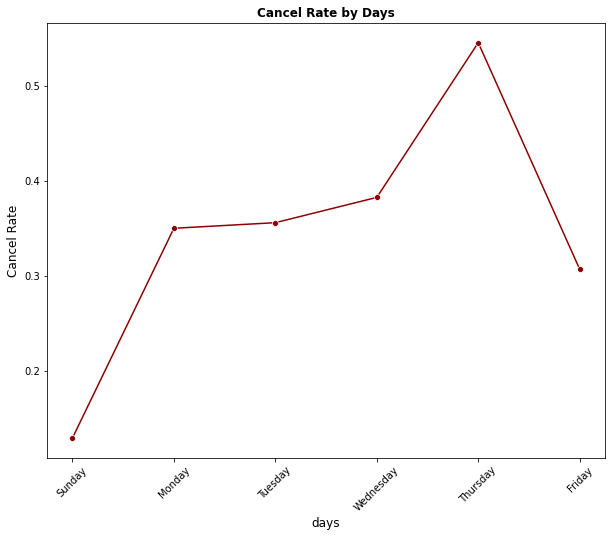

In [378]:
plt.figure(figsize=(10,8))
sns.lineplot(x = "weekdays", y = "CancelRate", data = cancel_rate_days, marker = "o",color="darkred")
plt.title("Cancel Rate by Days",fontweight="bold")
plt.xlabel("days",fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.ylabel("Cancel Rate",fontsize=12);

In [382]:
cancel_rate_hour  = (df_cancel.groupby("hours")["CustomerID"].count()/len(df_uk) * 100)
cancel_rate_hour = cancel_rate_hour.reset_index().sort_values("hours",ascending=True)
cancel_rate_hour.columns = ['hours',"CancelRate"]
cancel_rate_hour

hours  CancelRate
0       6    0.007392
1       7    0.001183
2       8    0.015376
3       9    0.111179
4      10    0.223540
5      11    0.265528
6      12    0.282974
7      13    0.252518
8      14    0.211417
9      15    0.197224
10     16    0.202842
11     17    0.176822
12     18    0.052041
13     19    0.048493
14     20    0.020107

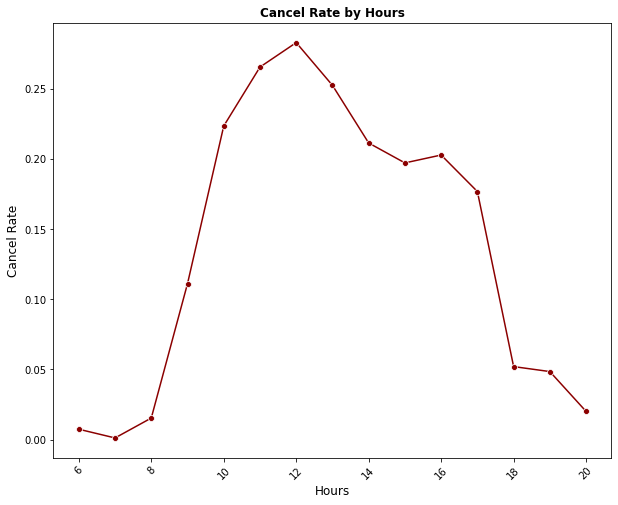

In [383]:
plt.figure(figsize=(10,8))
sns.lineplot(x = "hours", y = "CancelRate", data = cancel_rate_hour, marker = "o",color="darkred")
plt.title("Cancel Rate by Hours",fontweight="bold")
plt.xlabel("Hours",fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.ylabel("Cancel Rate",fontsize=12);

# Analysis Repeat Customer

In [406]:
invoice_customer  = df_uk.groupby(["InvoiceNo","InvoiceDate"]).agg({
    "TotalSales":sum,
    "CustomerID":max
}).reset_index()

invoice_customer.head()

InvoiceNo         InvoiceDate  TotalSales  CustomerID
0    536365 2010-12-01 08:26:00      139.12     17850.0
1    536366 2010-12-01 08:28:00       22.20     17850.0
2    536367 2010-12-01 08:34:00      278.73     13047.0
3    536368 2010-12-01 08:34:00       70.05     13047.0
4    536369 2010-12-01 08:35:00       17.85     13047.0

In [411]:
monthly_repeat = invoice_customer.set_index('InvoiceDate').groupby([pd.Grouper(freq="M"),'CustomerID']) \
                 .filter(lambda x: len(x) > 1).resample("M").nunique()["CustomerID"]

monthly_repeat.head()

InvoiceDate
2010-12-31    241
2011-01-31    141
2011-02-28    137
2011-03-31    179
2011-04-30    160
Freq: M, Name: CustomerID, dtype: int64

In [414]:
monthly_unique_customers_df = df_uk.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

monthly_unique_customers_df.head()

InvoiceDate
2010-12-31    814
2011-01-31    645
2011-02-28    678
2011-03-31    879
2011-04-30    784
Freq: M, Name: CustomerID, dtype: int64

In [415]:
monthly_repeat_percentage = monthly_repeat/monthly_unique_customers_df*100.0

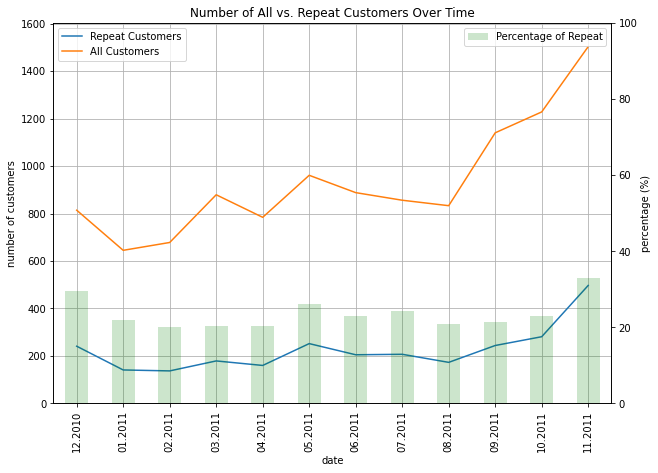

In [418]:
ax = pd.DataFrame(monthly_repeat.values).plot(figsize=(10,7))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,
                                                              color='green',alpha=0.2)
ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')
ax2.set_ylabel('percentage (%)')
ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')
ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])
plt.xticks(range(len(monthly_repeat.index)),
           [x.strftime('%m.%Y') for x in monthly_repeat.index],rotation=45)
plt.show()


In [422]:
#analisis monthly revenue by customer repeat order

#calculate monhtly revenue
monthly_revenue_df = df_uk.set_index('InvoiceDate')['TotalSales'].resample('M').sum()

#calculated monhtly revenue by repeat customer
monthly_rev_repeat_customers_df = invoice_customer.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']) \
                                    .filter(lambda x: len(x) > 1).resample('M').sum()['TotalSales']

#percentage
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0

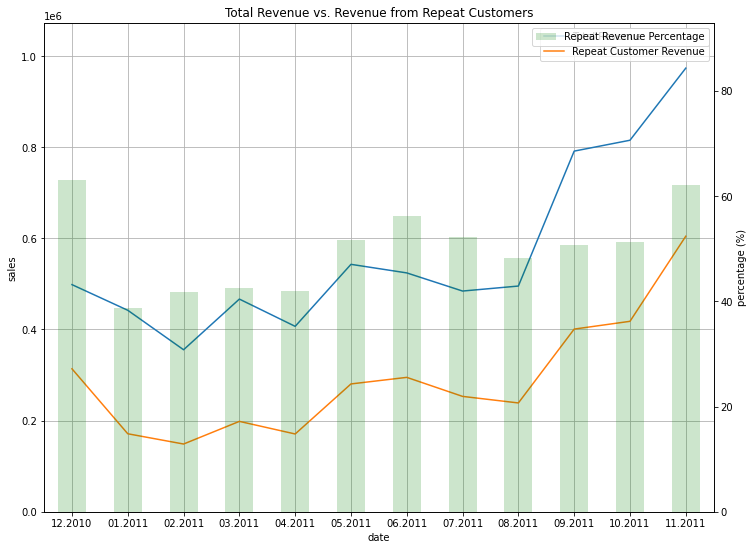

In [426]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')
ax.legend(['Total Revenue', 'Repeat Customer Revenue'])
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='g',alpha=0.2)
ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])
ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])
plt.show()


# Analysis for Model Definition

In [33]:
#analisis repeated purchase dan days purchase
df_order = df_uk.groupby(["CustomerID","InvoiceNo"]).agg({"TotalSales":sum,
                                                         "InvoiceDate":max})
df_order.head()

TotalSales         InvoiceDate
CustomerID InvoiceNo                                
12346.0    541431       77183.60 2011-01-18 10:01:00
12747.0    537215         358.56 2010-12-05 15:38:00
           538537         347.71 2010-12-13 10:41:00
           541677         303.04 2011-01-20 14:01:00
           545321         310.78 2011-03-01 14:53:00

In [34]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [35]:
summary_df = df_order.reset_index().groupby('CustomerID').agg({
                    'TotalSales': [min, max, sum, groupby_mean, groupby_count],
                    'InvoiceDate': [min, max, purchase_duration, avg_frequency]})

summary_df.head()

TotalSales                                           \
                  min       max       sum           avg  count   
CustomerID                                                       
12346.0      77183.60  77183.60  77183.60  77183.600000    1.0   
12747.0        301.70    675.38   3757.51    375.751000   10.0   
12748.0          0.95   2026.70  31247.90    158.618782  197.0   
12749.0         29.70   1866.43   3277.82    819.455000    4.0   
12820.0        170.46    343.76    731.99    243.996667    3.0   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12747.0    2010-12-05 15:38:00 2011-11-17 17:13:00               347   
12748.0    2010-12-01 12:48:00 2011-11-29 18:14:00               363   
12749.0    2011-05-10 15:25:00 2011-11-17 12:05:00               190   
12820.0    2011-01-17 12:34:00 2011-10-26 13:27:00               282   

                               
           purchase_frequency  
CustomerID                     
12346.0               0.00000  
12747.0              34.70000  
12748.0               1.84264  
12749.0              47.50000  
12820.0              94.00000

In [36]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]
summary_df = summary_df.reset_index()
summary_df.head()

CustomerID  totalsales_min  totalsales_max  totalsales_sum  totalsales_avg  \
0     12346.0        77183.60        77183.60        77183.60    77183.600000   
1     12747.0          301.70          675.38         3757.51      375.751000   
2     12748.0            0.95         2026.70        31247.90      158.618782   
3     12749.0           29.70         1866.43         3277.82      819.455000   
4     12820.0          170.46          343.76          731.99      243.996667   

   totalsales_count     invoicedate_min     invoicedate_max  \
0               1.0 2011-01-18 10:01:00 2011-01-18 10:01:00   
1              10.0 2010-12-05 15:38:00 2011-11-17 17:13:00   
2             197.0 2010-12-01 12:48:00 2011-11-29 18:14:00   
3               4.0 2011-05-10 15:25:00 2011-11-17 12:05:00   
4               3.0 2011-01-17 12:34:00 2011-10-26 13:27:00   

   invoicedate_purchase_duration  invoicedate_purchase_frequency  
0                              0                         0.00000  
1                            347                        34.70000  
2                            363                         1.84264  
3                            190                        47.50000  
4                            282                        94.00000

In [37]:
#filter data purchase duration which have duration equals to 0
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]
len(summary_df)

2424

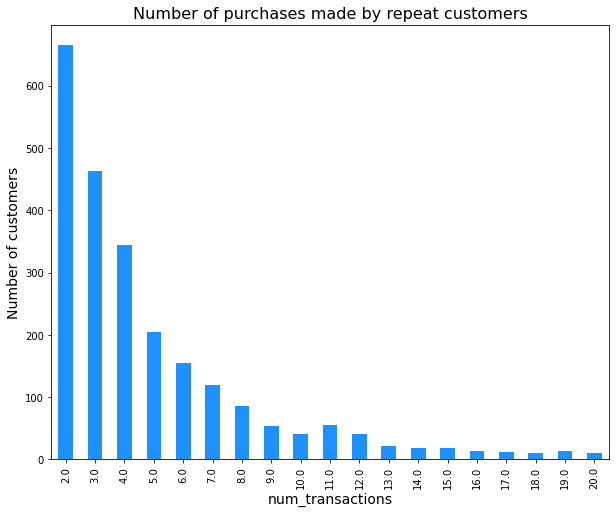

In [38]:
# Let's look at the number of purchases
ax = summary_df.groupby('totalsales_count').count()['totalsales_avg'][:20].plot(
        kind='bar', 
        color='dodgerblue', 
        figsize=(10,8), 
        grid=False)
plt.xlabel('num_transactions', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Number of purchases made by repeat customers', fontsize=16);

Jumlah pemesanan yang dibuat oleh customer yang sama setidaknya kurang dari 10

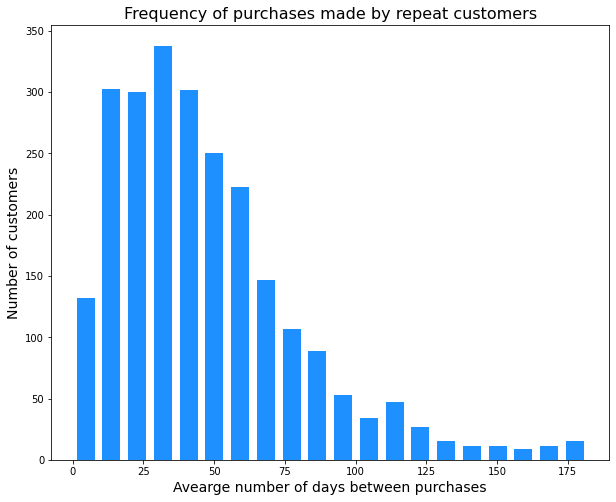

In [39]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
        bins=20,
        color='dodgerblue',
        rwidth=0.7,
        figsize=(10,8),
        grid=False)
plt.xlabel('Avearge number of days between purchases', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Frequency of purchases made by repeat customers', fontsize=16);

Plot ini memberi tahu kita pandangan keseluruhan tentang seberapa sering pelanggan berulang melakukan pembelian secara historis. mayoritas pelanggan tetap melakukan pembelian setiap 20 hingga 60 hari, kemudian mengalami penurunan yang drastis setelah 60 hari. penurunan terlihat stabil pada hari ke 90. <br>

disini kita dapat melakukan prediksi customer lifetime value 3 bulan selanjutnya setelah transaksi.

# CLV Next 3 Months

In [40]:
clv_freq = '3M'

data_df = df_order.reset_index().groupby(['CustomerID',pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'TotalSales': [sum, groupby_mean, groupby_count]})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

data_df = data_df.reset_index()
data_df.head()

CustomerID InvoiceDate  totalsales_sum  totalsales_avg  totalsales_count
0     12346.0  2011-03-31        77183.60    77183.600000               1.0
1     12747.0  2010-12-31          706.27      353.135000               2.0
2     12747.0  2011-03-31          613.82      306.910000               2.0
3     12747.0  2011-06-30         1147.61      382.536667               3.0
4     12747.0  2011-09-30          301.70      301.700000               1.0

In [41]:
#membuat mapping 3 bulan
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
    sorted(data_df.reset_index()["InvoiceDate"].unique()))
}
date_month_map

{'2010-12-31': 'M_1',
 '2011-03-31': 'M_2',
 '2011-06-30': 'M_3',
 '2011-09-30': 'M_4',
 '2011-12-31': 'M_5'}

Keterangan : <br>
M_1 =  acuan trx pertama <br>
M_2 = transaksi 3 bulan pertama <br>
M_3 = transaksi 3 bulan ke - 2, etc. <br>
M_5 = target

In [42]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

CustomerID InvoiceDate  totalsales_sum  totalsales_avg  totalsales_count  \
0     12346.0  2011-03-31        77183.60    77183.600000               1.0   
1     12747.0  2010-12-31          706.27      353.135000               2.0   
2     12747.0  2011-03-31          613.82      306.910000               2.0   
3     12747.0  2011-06-30         1147.61      382.536667               3.0   
4     12747.0  2011-09-30          301.70      301.700000               1.0   

     M  
0  M_2  
1  M_1  
2  M_2  
3  M_3  
4  M_4

In [43]:
df_feature = pd.pivot_table(data_df.loc[data_df["M"] != "M_5"],index="CustomerID",columns="M",
                           values=["totalsales_sum","totalsales_avg",'totalsales_count'])

df_feature.columns =  ['_'.join(col).lower() for col in df_feature.columns]

df_feature = df_feature.fillna(0)

df_feature.head()

totalsales_avg_m_1  totalsales_avg_m_2  totalsales_avg_m_3  \
CustomerID                                                               
12346.0               0.000000        77183.600000            0.000000   
12747.0             353.135000          306.910000          382.536667   
12748.0             119.597143           93.227619          109.714000   
12749.0               0.000000            0.000000          859.100000   
12820.0               0.000000          170.460000            0.000000   

            totalsales_avg_m_4  totalsales_count_m_1  totalsales_count_m_2  \
CustomerID                                                                   
12346.0               0.000000                   0.0                   1.0   
12747.0             301.700000                   2.0                   2.0   
12748.0             219.924865                  35.0                  21.0   
12749.0             948.065000                   0.0                   0.0   
12820.0             217.770000                   0.0                   1.0   

            totalsales_count_m_3  totalsales_count_m_4  totalsales_sum_m_1  \
CustomerID                                                                   
12346.0                      0.0                   0.0                0.00   
12747.0                      3.0                   1.0              706.27   
12748.0                     45.0                  37.0             4185.90   
12749.0                      1.0                   2.0                0.00   
12820.0                      0.0                   1.0                0.00   

            totalsales_sum_m_2  totalsales_sum_m_3  totalsales_sum_m_4  
CustomerID                                                              
12346.0               77183.60                0.00                0.00  
12747.0                 613.82             1147.61              301.70  
12748.0                1957.78             4937.13             8137.22  
12749.0                   0.00              859.10             1896.13  
12820.0                 170.46                0.00              217.77

In [44]:
df_feature.columns

Index(['totalsales_avg_m_1', 'totalsales_avg_m_2', 'totalsales_avg_m_3',
       'totalsales_avg_m_4', 'totalsales_count_m_1', 'totalsales_count_m_2',
       'totalsales_count_m_3', 'totalsales_count_m_4', 'totalsales_sum_m_1',
       'totalsales_sum_m_2', 'totalsales_sum_m_3', 'totalsales_sum_m_4'],
      dtype='object')

In [45]:
target_df = data_df.loc[data_df["M"] == "M_5",["CustomerID","totalsales_sum"]]

target_df.columns = ["CustomerID","CLV_"+clv_freq]

target_df.head()

CustomerID    CLV_3M
5      12747.0    988.11
10     12748.0  12029.87
13     12749.0    522.59
16     12820.0    343.76
21     12824.0    397.12

In [46]:
model_df = df_feature.merge(target_df,on="CustomerID",how='left')
model_df = model_df.fillna(0)
model_df.head()

CustomerID  totalsales_avg_m_1  totalsales_avg_m_2  totalsales_avg_m_3  \
0     12346.0            0.000000        77183.600000            0.000000   
1     12747.0          353.135000          306.910000          382.536667   
2     12748.0          119.597143           93.227619          109.714000   
3     12749.0            0.000000            0.000000          859.100000   
4     12820.0            0.000000          170.460000            0.000000   

   totalsales_avg_m_4  totalsales_count_m_1  totalsales_count_m_2  \
0            0.000000                   0.0                   1.0   
1          301.700000                   2.0                   2.0   
2          219.924865                  35.0                  21.0   
3          948.065000                   0.0                   0.0   
4          217.770000                   0.0                   1.0   

   totalsales_count_m_3  totalsales_count_m_4  totalsales_sum_m_1  \
0                   0.0                   0.0                0.00   
1                   3.0                   1.0              706.27   
2                  45.0                  37.0             4185.90   
3                   1.0                   2.0                0.00   
4                   0.0                   1.0                0.00   

   totalsales_sum_m_2  totalsales_sum_m_3  totalsales_sum_m_4    CLV_3M  
0            77183.60                0.00                0.00      0.00  
1              613.82             1147.61              301.70    988.11  
2             1957.78             4937.13             8137.22  12029.87  
3                0.00              859.10             1896.13    522.59  
4              170.46                0.00              217.77    343.76

<AxesSubplot:>

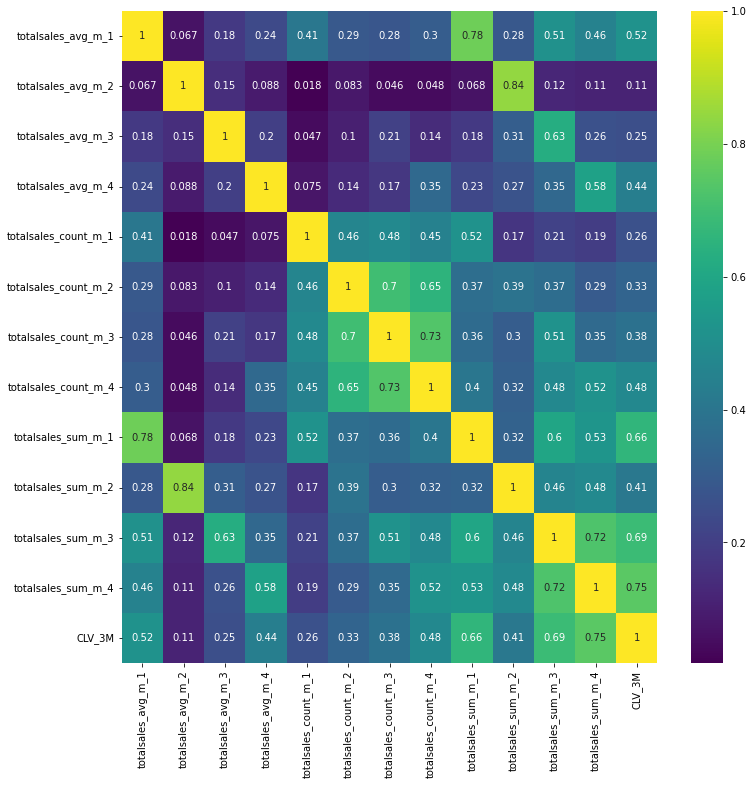

In [47]:
plt.figure(figsize=(12,12))
sns.heatmap(model_df.drop("CustomerID",axis=1).corr(),annot=True,fmt=".2g",cmap="viridis")

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_feature.columns
vif_data["VIF"] = [variance_inflation_factor(df_feature.values, i) for i in range(len(df_feature.columns))]

In [50]:
vif_data

feature        VIF
0     totalsales_avg_m_1   2.872407
1     totalsales_avg_m_2   7.929464
2     totalsales_avg_m_3   2.494857
3     totalsales_avg_m_4   2.037410
4   totalsales_count_m_1   2.075748
5   totalsales_count_m_2   3.847672
6   totalsales_count_m_3   4.291878
7   totalsales_count_m_4   4.153720
8     totalsales_sum_m_1   3.930344
9     totalsales_sum_m_2  11.916457
10    totalsales_sum_m_3   6.385033
11    totalsales_sum_m_4   5.278813

In [51]:
#lets drop totalsales_avg_m_2
df_feature = df_feature.drop("totalsales_avg_m_2",axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = df_feature.columns
vif_data["VIF"] = [variance_inflation_factor(df_feature.values, i) for i in range(len(df_feature.columns))]
vif_data

feature       VIF
0     totalsales_avg_m_1  2.868464
1     totalsales_avg_m_3  2.470104
2     totalsales_avg_m_4  1.988083
3   totalsales_count_m_1  2.074988
4   totalsales_count_m_2  3.076957
5   totalsales_count_m_3  4.290626
6   totalsales_count_m_4  4.042043
7     totalsales_sum_m_1  3.923519
8     totalsales_sum_m_2  1.590462
9     totalsales_sum_m_3  6.370590
10    totalsales_sum_m_4  4.080652

In [52]:
#model_df = model_df.drop("totalsales_avg_m_2",axis=1)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target_var = 'CLV_'+clv_freq

all_features = [x for x in model_df.columns if x not in ['CustomerID',target_var]]

X_train, X_test, y_train, y_test = train_test_split(model_df[all_features],model_df[target_var],test_size=0.35)

reg_fit = LinearRegression(n_jobs=1)
reg_fit.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [54]:
coef = pd.DataFrame(list(zip(all_features,reg_fit.coef_)))
coef.columns = ["feature","coef"]
coef

feature       coef
0     totalsales_avg_m_1  -0.413302
1     totalsales_avg_m_2  -0.130008
2     totalsales_avg_m_3  -0.187756
3     totalsales_avg_m_4   0.041503
4   totalsales_count_m_1 -29.952740
5   totalsales_count_m_2  15.215744
6   totalsales_count_m_3  20.214450
7   totalsales_count_m_4 -49.388848
8     totalsales_sum_m_1   0.584553
9     totalsales_sum_m_2   0.153641
10    totalsales_sum_m_3   0.167309
11    totalsales_sum_m_4   0.523845

In [55]:
# eval model
#metrics R2,MAE

from sklearn.metrics import r2_score,mean_absolute_error,median_absolute_error

y_train_pred = reg_fit.predict(X_train)
y_test_pred = reg_fit.predict(X_test)

rmse_train = np.sqrt(mean_absolute_error(y_train,y_train_pred))
rmse_test = np.sqrt(mean_absolute_error(y_test,y_test_pred))

print('R2 score Train : ',r2_score(y_train,y_train_pred))
print('mean absolute error Train',mean_absolute_error(y_train,y_train_pred))
print("median absolute error Train",median_absolute_error(y_train,y_train_pred))
print("RMSE Train: %f" % (rmse_train))

print()

print('R2 score Test : ',r2_score(y_test,y_test_pred))
print("mean absolute Test : ", mean_absolute_error(y_test,y_test_pred))
print("median absolute error Test",median_absolute_error(y_test,y_test_pred))
print("RMSE Train: %f" % (rmse_test))

R2 score Train :  0.5784571361946842
mean absolute error Train 348.55197542101104
median absolute error Train 152.57717590228583
RMSE Train: 18.669547

R2 score Test :  0.6514771348303985
mean absolute Test :  405.42653150917613
median absolute error Test 153.83859002864426
RMSE Train: 20.135206


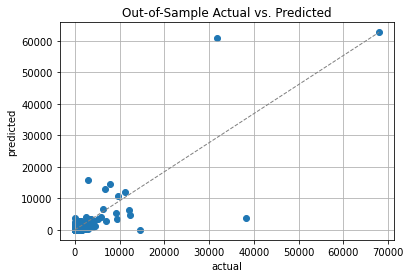

In [56]:
plt.scatter(y_test, y_test_pred)
plt.plot([0, max(y_test)], [0, max(y_test_pred)], color='gray', lw=1, linestyle='--')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Actual vs Predicted Model Linear Regressi')
plt.grid()
plt.show()

In [57]:
# define ridge regression model
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)

In [58]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [59]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

params  mean_test_score  rank_test_score
0   {'alpha': 1e-06}     -1633.422102               10
1   {'alpha': 1e-05}     -1633.422101                9
2  {'alpha': 0.0001}     -1633.422093                8
3   {'alpha': 0.001}     -1633.422014                7
4    {'alpha': 0.01}     -1633.421223                6
5     {'alpha': 0.1}     -1633.413310                5
6       {'alpha': 1}     -1633.334300                4
7       {'alpha': 5}     -1632.985757                3
8      {'alpha': 10}     -1632.555961                2
9      {'alpha': 20}     -1631.715337                1

In [60]:
coef = pd.DataFrame(list(zip(all_features,ridge_reg_gridcv.best_estimator_.coef_)))
coef.columns = ["feature","coef"]
coef

feature       coef
0     totalsales_avg_m_1  -0.413495
1     totalsales_avg_m_2  -0.130526
2     totalsales_avg_m_3  -0.188092
3     totalsales_avg_m_4   0.041690
4   totalsales_count_m_1 -29.519331
5   totalsales_count_m_2  14.915434
6   totalsales_count_m_3  19.930680
7   totalsales_count_m_4 -48.898362
8     totalsales_sum_m_1   0.584105
9     totalsales_sum_m_2   0.154173
10    totalsales_sum_m_3   0.167494
11    totalsales_sum_m_4   0.523482

In [108]:
# evaluate the best model on test data

y_train_pred = ridge_reg_gridcv.best_estimator_.predict(X_train)
y_test_pred = ridge_reg_gridcv.best_estimator_.predict(X_test)

rmse_train = np.sqrt(mean_absolute_error(y_train,y_train_pred))
rmse_test = np.sqrt(mean_absolute_error(y_test,y_test_pred))


print('R2 score Train : ',r2_score(y_train,y_train_pred))
print('mean absolute error Train',mean_absolute_error(y_train,y_train_pred))
print('median absolute error Train',median_absolute_error(y_train,y_train_pred))
print("RMSE Train: %f" % (rmse_train))

print()

print('R2 score Test : ',r2_score(y_test,y_test_pred))
print("mean absolute Test : ", mean_absolute_error(y_test,y_test_pred))
print('median absolute error Train',median_absolute_error(y_test,y_test_pred))
print("RMSE Test: %f" % (rmse_test))

R2 score Train :  0.5784569096109364
mean absolute error Train 348.53353138706757
median absolute error Train 152.5917997648602
RMSE Train: 18.669053

R2 score Test :  0.6515554964571595
mean absolute Test :  405.4040986475564
median absolute error Train 154.07728357013747
RMSE Test: 20.134649


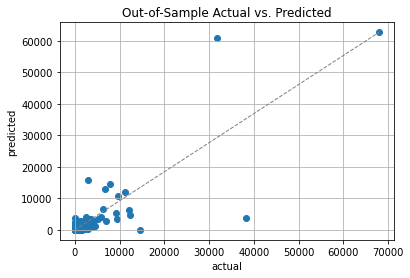

In [62]:
plt.scatter(y_test, y_test_pred)
plt.plot([0, max(y_test)], [0, max(y_test_pred)], color='gray', lw=1, linestyle='--')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()
plt.show()

In [137]:
import dalex as dx

In [138]:
## initiate explainer for ridge regression model
reg_explain = dx.Explainer(ridge_reg_gridcv, X_train, y_train, label = "Ridge Interpretation")

Preparation of a new explainer is initiated

  -> data              : 2120 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2120 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : Ridge Interpretation
  -> predict function  : <function yhat_default at 0x000002FCAD3131F0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -68.0, mean = 4.17e+02, max = 2.02e+04
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -7.77e+03, mean = -3.43e-15, max = 1.86e+04
  -> model_info        : package sklearn

A new explainer has been created!


C:\Users\hrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [139]:
# visualize permutation feature importance for ridge regression
reg_explain.model_parts().plot()

In [140]:
# create partial dependence plot of Random Forest model
reg_explain.model_profile().plot()

Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 12/12 [00:00<00:00, 85.84it/s]


# Clustering Segment

In [117]:
df_customer = df_uk.groupby("CustomerID").agg({"TotalSales":"sum",
                                             "InvoiceNo":lambda x: x.nunique()})

df_customer.columns = ["TotalSales","OrderCount"]
df_customer["AvgOrderValue"] = df_customer["TotalSales"]/df_customer["OrderCount"]
df_customer.head()

TotalSales  OrderCount  AvgOrderValue
CustomerID                                       
12346.0       77183.60           1   77183.600000
12747.0        3757.51          10     375.751000
12748.0       31247.90         197     158.618782
12749.0        3277.82           4     819.455000
12820.0         731.99           3     243.996667

In [122]:
#ranking
df_rank = df_customer.rank(method='first')

#normalize
df_rank = (df_rank  - df_rank.mean())/df_rank.std()

df_rank.head()

TotalSales  OrderCount  AvgOrderValue
CustomerID                                       
12346.0       1.728705   -1.731382       1.731382
12747.0       1.455681    1.435160       0.691036
12748.0       1.710860    1.731382      -1.022055
12749.0       1.388763    0.574153       1.563642
12820.0       0.171755    0.157479      -0.231535

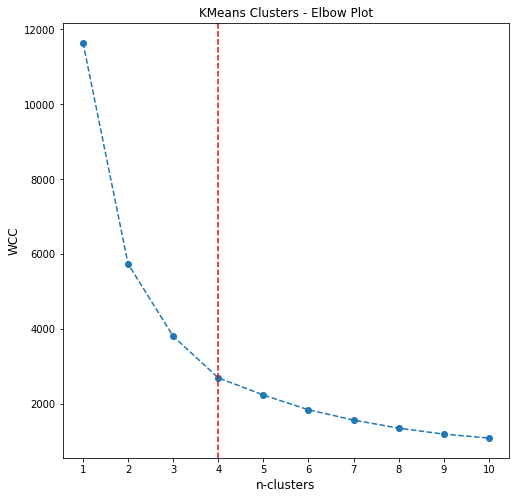

In [123]:
# K_means Clustering

from sklearn.cluster import KMeans

wcc = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(df_rank)
    wcc.append(kmeans.inertia_)
    
#plot
plt.figure(figsize=(8,8))
plt.plot(range(1,11),wcc,marker="o",linestyle="--")
plt.title("KMeans Clusters - Elbow Plot",fontsize=12)
plt.xlabel("n-clusters",fontsize=12)
plt.ylabel("WCC",fontsize=12)
plt.xticks(range(1,11))
plt.axvline(x=4,linestyle="--",color='r');

In [143]:
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)
kmeans.fit(df_rank)

KMeans(n_clusters=4, random_state=42)

In [144]:
four_cluster_df = df_rank[['TotalSales', 'OrderCount',
'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

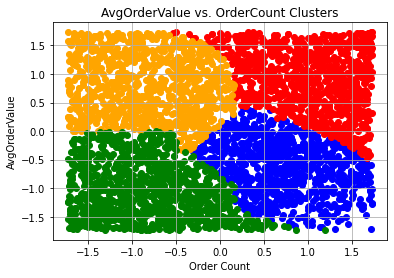

In [145]:
plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
c='blue')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
c='red')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
c='orange')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
c='green')

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('AvgOrderValue')
plt.grid()
plt.show()

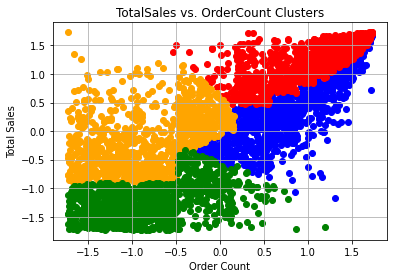

In [146]:
plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
c='blue')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
c='red')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
c='orange')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
c='green')

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

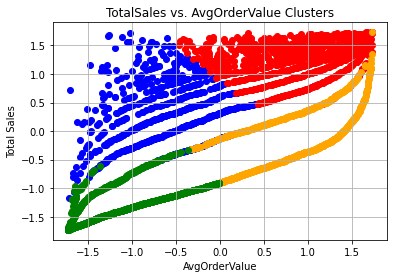

In [147]:
plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
c='blue')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
c='red')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
c='orange')

plt.scatter(four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
c='green')

plt.title('TotalSales vs. AvgOrderValue Clusters')
plt.xlabel('AvgOrderValue')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

In [148]:
#interpretet cluster
df_customer["cluster"] = kmeans.labels_
df_customer.head()

TotalSales  OrderCount  AvgOrderValue  cluster
CustomerID                                                
12346.0       77183.60           1   77183.600000        2
12747.0        3757.51          10     375.751000        1
12748.0       31247.90         197     158.618782        0
12749.0        3277.82           4     819.455000        1
12820.0         731.99           3     243.996667        0

In [149]:
df_customer.groupby("cluster").mean()

TotalSales  OrderCount  AvgOrderValue
cluster                                        
0        1048.899908    5.537228     203.257948
1        5002.998791    8.363636     567.273877
2         708.031529    1.332984     568.422010
3         185.820418    1.324786     148.046604

dari clusterisasi, didapatkan bahwa segment customer terbaik berada pada cluster 1 dengan rata rata total sales, Order count dan AvgOrderValue yang tinggi

In [150]:
high_value_cluster = df_customer.loc[df_customer['cluster'] == 1]

pd.DataFrame(df_uk.loc[df_uk["CustomerID"].isin(high_value_cluster.index)]. \
            groupby("Description").count()["StockCode"].sort_values(ascending=False).head())

StockCode
Description                                  
JUMBO BAG RED RETROSPOT                  1023
WHITE HANGING HEART T-LIGHT HOLDER       1017
REGENCY CAKESTAND 3 TIER                  849
LUNCH BAG RED RETROSPOT                   803
PARTY BUNTING                             800

# Recommendation System

In [177]:
from scipy.sparse import coo_matrix
#!pip install LightFM # menginstall package LightFM
from lightfm import LightFM
from lightfm.evaluation import auc_score
import time

C:\Users\hrd\anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning:

LightFM was compiled without OpenMP support. Only a single thread will be used.



In [208]:
def get_user_list(df, user_column):
    """
    Membuat list unik user dari dataframe df, user_column merupakan kolom yang berisi user di dalam dataframe df
    """
    user_list = np.sort(df[user_column].unique())
    return user_list


In [209]:
users = get_user_list(df_uk, "CustomerID")

In [210]:
def get_item_list(df, item_name_column):
    """
    Membuat unik list item/produk dari dataframe df, item_name_column merupakan kolom yang berisi 
    nama item/produk di dalam dataframe df
    """
    item_list = df[item_name_column].unique()
    return item_list

In [211]:
items = get_item_list(df_uk, "StockCode")

In [212]:
# LightFM tidak dapat membaca objek yang tidak berindeks, oleh karena itu perlu adanya pemetaan user dan item ke index
# Membuat kamus pemetakan user_id ke index, index ke user_id, item_id ke index, and index ke item_id.
def id_mappings(user_list, item_list):
    """
    Membuat id mappings untuk mengkonversi user_id, dan item_id
    """
    user_to_index_mapping = {}
    index_to_user_mapping = {}
    for user_index, user_id in enumerate(user_list):
        user_to_index_mapping[user_id] = user_index
        index_to_user_mapping[user_index] = user_id
        
    item_to_index_mapping = {}
    index_to_item_mapping = {}
    for item_index, item_id in enumerate(item_list):
        item_to_index_mapping[item_id] = item_index
        index_to_item_mapping[item_index] = item_id
  
    return user_to_index_mapping, index_to_user_mapping, item_to_index_mapping, index_to_item_mapping

In [213]:
# Generate mapping
user_to_index_mapping, index_to_user_mapping, item_to_index_mapping, index_to_item_mapping = id_mappings(users, items)

In [201]:
recom_product = df_uk.groupby(["CustomerID","StockCode"],as_index=False)["Description"].count()
recom_product = recom_product.rename(columns = {"Description":"CountOrder"})
recom_product.head()

CustomerID StockCode  CountOrder
0     12346.0     23166           1
1     12747.0     20711           1
2     12747.0     21136           6
3     12747.0     21745           4
4     12747.0     21754           5

In [203]:
mask = np.random.rand(len(recom_product))<0.8
recom_train = recom_product[mask]
recom_test = recom_product[~mask]

In [204]:
recom_train.head()

CustomerID StockCode  CountOrder
0     12346.0     23166           1
1     12747.0     20711           1
2     12747.0     21136           6
6     12747.0     22120           4
7     12747.0     22386           2

In [205]:
recom_test.head()

CustomerID StockCode  CountOrder
3      12747.0     21745           4
4      12747.0     21754           5
5      12747.0     21929           1
8      12747.0     22411           1
13     12747.0     22430           1

In [207]:
def get_interaction_matrix(df, df_column_as_row, df_column_as_col, df_column_as_value, row_indexing_map, col_indexing_map):
    
    row = df[df_column_as_row].apply(lambda x: row_indexing_map[x]).values
    col = df[df_column_as_col].apply(lambda x: col_indexing_map[x]).values
    value = df[df_column_as_value].values
    
    return coo_matrix((value, (row, col)), shape = (len(row_indexing_map), len(col_indexing_map)))

In [214]:
#generate user_item_interaction_matrix untuk data train
user_to_product_interaction_train = get_interaction_matrix(recom_train, "CustomerID", "StockCode", "CountOrder", user_to_index_mapping, item_to_index_mapping)

# generate user_item_interaction_matrix untuk data test
user_to_product_interaction_test = get_interaction_matrix(recom_test, "CustomerID", "StockCode", "CountOrder", user_to_index_mapping, item_to_index_mapping)


In [215]:
# inisialisasi model dengan warp loss fuction
model_without_features = LightFM(loss = "warp")

# fitting into user to product interaction matrix only / pure collaborative filtering factor
start = time.time()
#===================

model_without_features.fit(user_to_product_interaction_train,
          user_features=None, 
          item_features=None, 
          sample_weight=None, 
          epochs=1, 
          num_threads=4,
          verbose=False)

#===================
end = time.time()
print("time taken = {0:.{1}f} seconds".format(end - start, 2))

# auc metric score (ranging from 0 to 1)

start = time.time()
#===================

auc_without_features = auc_score(model = model_without_features, 
                        test_interactions = user_to_product_interaction_test,
                        num_threads = 4, check_intersections = False)
#===================
end = time.time()

print("time taken = {0:.{1}f} seconds".format(end - start, 2))
print("average AUC without adding item-feature interaction = {0:.{1}f}".format(auc_without_features.mean(), 2))

time taken = 1.08 seconds
time taken = 1.54 seconds
average AUC without adding item-feature interaction = 0.80


In [216]:
#prediction
# Menggabungkan train dataset dan test dataset
def combined_train_test(train, test):
    # Menginisiasi dictionary train
    train_dict = {}
    for train_row, train_col, train_data in zip(train.row, train.col, train.data):
        train_dict[(train_row, train_col)] = train_data
        
    # Mengganti train dengan test
    
    for test_row, test_col, test_data in zip(test.row, test.col, test.data):
        train_dict[(test_row, test_col)] = max(test_data, train_dict.get((test_row, test_col), 0))
        
    
    # converting to the row
    row_element = []
    col_element = []
    data_element = []
    for row, col in train_dict:
        row_element.append(row)
        col_element.append(col)
        data_element.append(train_dict[(row, col)])
        
    # converting to np array
    
    row_element = np.array(row_element)
    col_element = np.array(col_element)
    data_element = np.array(data_element)
    
    return coo_matrix((data_element, (row_element, col_element)), shape = (train.shape[0], train.shape[1]))

In [217]:
user_to_product_interaction = combined_train_test(user_to_product_interaction_train, user_to_product_interaction_test)

In [218]:
# Pemodelan
final_model = LightFM(loss = "warp")

start = time.time()
#===================

final_model.fit(user_to_product_interaction,
          user_features=None, 
          item_features=None, 
          sample_weight=None, 
          epochs=1, 
          num_threads=4,
          verbose=False)

#===================
end = time.time()
print("time taken = {0:.{1}f} seconds".format(end - start, 2))

time taken = 1.22 seconds


In [219]:
# Class object untuk merekomendasikan
class recommendation_sampling:
    
    def __init__(self, model, items = items, user_to_product_interaction_matrix = user_to_product_interaction, 
                user2index_map = user_to_index_mapping):
        
        self.user_to_product_interaction_matrix = user_to_product_interaction_matrix
        self.model = model
        self.items = items
        self.user2index_map = user2index_map
    
    def recommendation_for_user(self, user):
        
        # getting the userindex
        
        userindex = self.user2index_map.get(user, None)
        
        if userindex == None:
            return None
        
        users = [userindex]
        
        # products already bought
        
        known_positives = self.items[self.user_to_product_interaction_matrix.tocsr()[userindex].indices]
        
        # scores from model prediction
        scores = self.model.predict(user_ids = users[0], item_ids = np.arange(self.user_to_product_interaction_matrix \
                                                                              .shape[1]))

        # top items
        
        top_items = self.items[np.argsort(-scores)]
        
        # printing out the result
        print("User %s" % user)
        print("     Known positives:")
        
        for x in known_positives[:3]:
            print("                  %s" % x)
            
            
        print("     Recommended:")
        
        for x in top_items[:3]:
            print("                  %s" % x)

In [220]:
# Memberi Rekomendasi
recom = recommendation_sampling(model = final_model)

In [243]:
recom.recommendation_for_user(12346.0)

User 12346.0
     Known positives:
                  23166
     Recommended:
                  22423
                  85123A
                  84879


In [223]:
df_uk[df_uk["CustomerID"]==12346.0][["Description"]]

Description
38120  MEDIUM CERAMIC TOP STORAGE JAR

# RFM Analysis

A) T - T is the length of the period of observation for the customer based on the value used for freq (the default is frequency is day). This can also be thought of the length of time between a customer’s first purchase and the end of the period, measured in increments defined by freq. <br>

B) Recency - Recency is the point (relative to their own period of observation) at which the customer made their most recent repeat purchase. This can also be thought of the length of time between a customer’s first and last purchase for the period, measured in increments defined by freq. <br>

C) Frequency - Frequency is the number of repeat purchases the customer made during the observation period. <br>

D) Monetary - monetary_value is the average monetary amount of each repeat purchase made by a customer. <br>

In [63]:
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
from lifetimes import ModifiedBetaGeoFitter

In [64]:
#calculating the recency, frequency, T, monetary_value
summary = lifetimes.utils.summary_data_from_transaction_data(df_uk, "CustomerID", "InvoiceDate", "TotalSales")
summary.head()

frequency  recency      T  monetary_value
CustomerID                                           
12346.0           0.0      0.0  316.0        0.000000
12747.0           9.0    347.0  360.0      377.661111
12748.0         106.0    363.0  364.0      294.744811
12749.0           2.0    191.0  204.0     1209.360000
12820.0           2.0    282.0  317.0      280.765000

In [65]:
summary = summary.reset_index()
print(summary.shape)
summary.head()

(3882, 5)


CustomerID  frequency  recency      T  monetary_value
0     12346.0        0.0      0.0  316.0        0.000000
1     12747.0        9.0    347.0  360.0      377.661111
2     12748.0      106.0    363.0  364.0      294.744811
3     12749.0        2.0    191.0  204.0     1209.360000
4     12820.0        2.0    282.0  317.0      280.765000

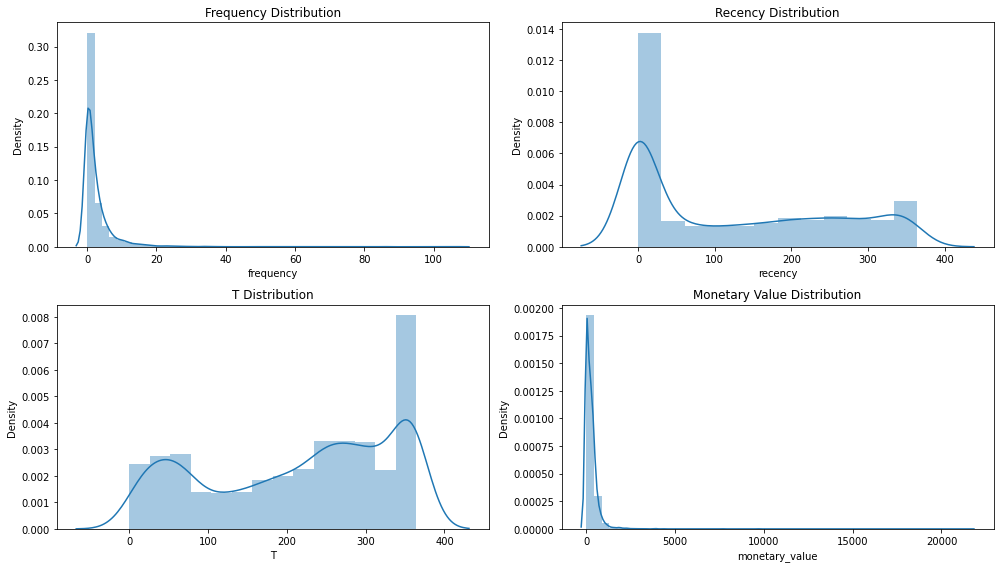

In [66]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

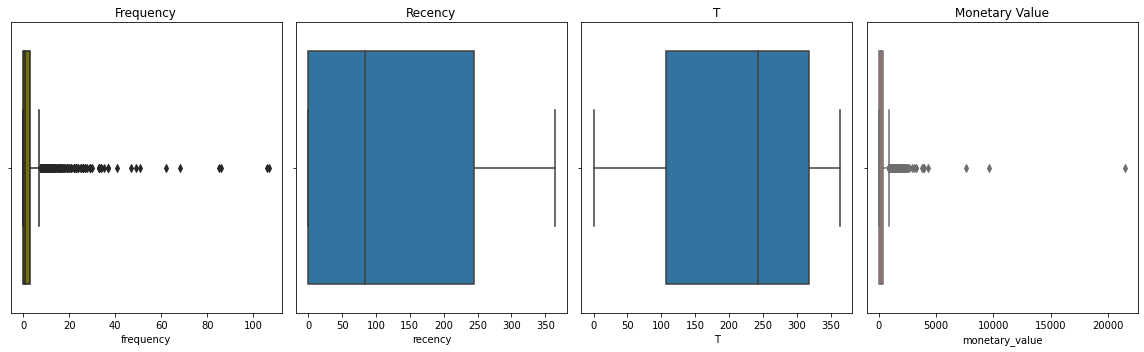

In [67]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(summary["monetary_value"], color = "salmon")
plt.title("Monetary Value")
plt.tight_layout()

In [68]:
#checking for the values containing zero.

print("Total Number of Frequency with 0: %s" % (len(summary[summary["frequency"] == 0])))
print("Total Number of Recency with 0: %s" % (len(summary[summary["recency"] == 0])))
print("Total Number of Monetary Value with 0: %s" % (len(summary[summary["monetary_value"]==0])))

Total Number of Frequency with 0: 1453
Total Number of Recency with 0: 1453
Total Number of Monetary Value with 0: 1453


Basic Terms: <br>

a) Contractual Customers - Contractual customers are subscription based customers. They churned on a defined date if they choose not to renew the subscription. <br>

b) Non-Contractual Customers - Non Contractual customers generally exist in e-commerce or retail business where there's no defined time period when the customer is going to churn. <br>

c) Continuous Purchase - It refers to the time period when the customer purchase a certain thing in any time period. Ex- Retail & E-commerce. <br>

d) Discrete Purchase - It refers to the time period when the customer purchase a certain thing on a specific time period. Ex - Netflix, Hulu, Hotstar Subscription. <br>

For this analysis we are going to use the non-contractual with continuous purchase opportunity and the best fitted models we are going to use will be BG-NBD Model, Pareto-NBD Model, Modifies BG Model along with Gamma Gamma Distribution model for estimating the expected monetary value as a part of the customer lifetime value prediction. <br>

# Beta Geo - Negative Binomial Distribution + Gamma Gamma Distribution Model

In [69]:
summary_bgf = summary.copy()

In [70]:
bgf = BetaGeoFitter(penalizer_coef = 0.0)

In [71]:
bgf.fit(summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

<lifetimes.BetaGeoFitter: fitted with 3882 subjects, a: 0.00, alpha: 71.80, b: 8.13, r: 0.84>

In [72]:
bgf.summary

coef   se(coef)  lower 95% bound  upper 95% bound
r       0.839308   0.029526         0.781438         0.897179
alpha  71.803443   2.934874        66.051089        77.555796
a       0.002894   0.012355        -0.021323         0.027111
b       8.132915  33.311738       -57.158091        73.423921

<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

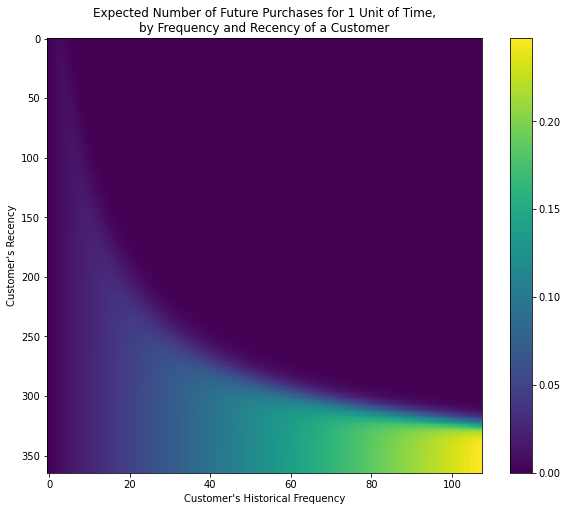

In [73]:
#plotting the frequency and recency matrix
plt.figure(figsize=(10,8))
plot_frequency_recency_matrix(bgf)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

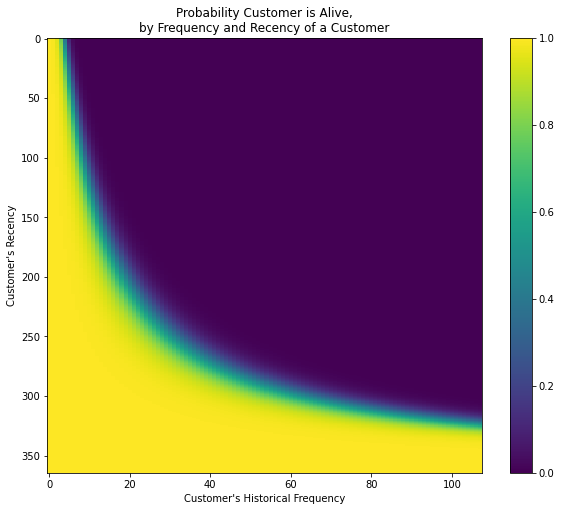

In [74]:
#plotting the churn matrix
plt.figure(figsize=(10,8))
plot_probability_alive_matrix(bgf)

In [75]:
t = 90 #days
summary_bgf["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])
summary_bgf.sort_values(by = "predicted_purchases").tail(5)

CustomerID  frequency  recency      T  monetary_value  \
110      12971.0       68.0    362.0  363.0      161.513088   
1256     14606.0       85.0    364.0  364.0      134.736706   
1757     15311.0       86.0    363.0  364.0      687.695930   
2        12748.0      106.0    363.0  364.0      294.744811   
3561     17841.0      107.0    363.0  364.0      354.009626   

      predicted_purchases  
110             14.244724  
1256            17.721910  
1757            17.928244  
2               22.057353  
3561            22.263808

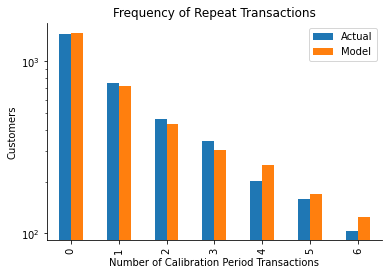

In [76]:
ax = plot_period_transactions(bgf, max_frequency=7)
ax.set_yscale('log')
sns.despine();

In [77]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(data, "CustomerID", "InvoiceDate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-11-30')

In [78]:
pd.DataFrame(summary_cal_holdout.head())

frequency_cal  recency_cal  T_cal  frequency_holdout  \
CustomerID                                                         
12346.0               0.0          0.0  141.0                0.0   
12347.0               2.0        121.0  183.0                3.0   
12348.0               2.0        110.0  174.0                1.0   
12350.0               0.0          0.0  126.0                0.0   
12352.0               3.0         34.0  112.0                3.0   

            duration_holdout  
CustomerID                    
12346.0                175.0  
12347.0                175.0  
12348.0                175.0  
12350.0                175.0  
12352.0                175.0

In [79]:
bgf.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.BetaGeoFitter: fitted with 2773 subjects, a: 0.00, alpha: 62.90, b: 17344.81, r: 0.74>

In [80]:
summary_cal_holdout.tail()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
CustomerID                                                         
18272.0               1.0         21.0   62.0                3.0   
18273.0               0.0          0.0   73.0                1.0   
18280.0               0.0          0.0   93.0                0.0   
18283.0               4.0        137.0  153.0                7.0   
18287.0               0.0          0.0   17.0                2.0   

            duration_holdout  
CustomerID                    
18272.0                175.0  
18273.0                175.0  
18280.0                175.0  
18283.0                175.0  
18287.0                175.0

<AxesSubplot:title={'center':'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

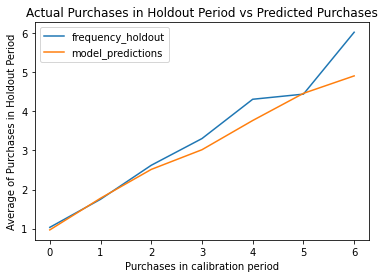

In [81]:
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

In [82]:
#Creating a function which can predict the future purchased value based on the lookup window

def bgf_get_pred_error(t, id_):
    
    individual = summary_bgf[summary_bgf["CustomerID"] == id_]
    
    ind_pred = bgf.predict(t, individual["frequency"], individual["recency"], individual["T"])
    
    actual_val = individual["frequency"]/individual["recency"]*t
    
    error = actual_val - ind_pred
    
    print("Your Predicted Purchase: %s" % (ind_pred))
    print("Your Actual Purchase: %s" % (actual_val))
    print("Prediction Error: %s" % (error))

In [83]:
bgf_get_pred_error(90, 18287.0)

Your Predicted Purchase: 3881    0.967629
dtype: float64
Your Actual Purchase: 3881    1.132075
dtype: float64
Prediction Error: 3881    0.164446
dtype: float64


In [84]:
#historical alive
from lifetimes.plotting import plot_history_alive

id_1 =17841.0
#id_2 = 12966.0
day_since_birth = 365
sp_trans_1 = df_uk.loc[df_uk["CustomerID"]==id_1]

<AxesSubplot:title={'center':'History of P_alive'}, ylabel='P_alive'>

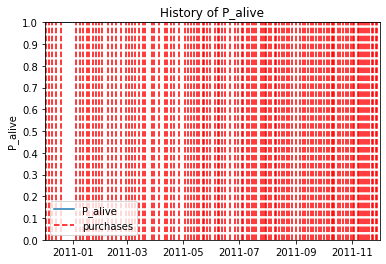

In [85]:
plot_history_alive(bgf,day_since_birth,sp_trans_1,"InvoiceDate")

In [86]:
summary_bgf["actual_90"] = summary_bgf["frequency"]/summary_bgf["recency"]*90

In [87]:
summary_bgf.head()

CustomerID  frequency  recency      T  monetary_value  predicted_purchases  \
0     12346.0        0.0      0.0  316.0        0.000000             0.194769   
1     12747.0        9.0    347.0  360.0      377.661111             2.049918   
2     12748.0      106.0    363.0  364.0      294.744811            22.057353   
3     12749.0        2.0    191.0  204.0     1209.360000             0.926026   
4     12820.0        2.0    282.0  317.0      280.765000             0.656889   

   actual_90  
0        NaN  
1   2.334294  
2  26.280992  
3   0.942408  
4   0.638298

In [88]:
summary_bgf = summary_bgf.fillna(value = 0)

In [274]:
#calculating the prediction error for the 90 days purchase prediction
summary_bgf["Error"] = summary_bgf["actual_90"] - summary_bgf["predicted_purchases"]

#calucalteed mean sqaured error from model
mse = mean_squared_error(summary_bgf["actual_90"],summary_bgf["predicted_purchases"])
mae = median_absolute_error(summary_bgf["actual_90"],summary_bgf['predicted_purchases'])

print('R2 Score: %s', r2_score( summary_bgf["actual_90"],summary_bgf["predicted_purchases"]))
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_bgf["Error"].mean())
print("Median Absolute %s" %mae)
print("Root Mean Squared Error: %s" % sqrt(mse))

R2 Score: %s 0.08879245136370173
Mean Squared Error: 21.546586618248636
Average Error:  0.5937191413127427
Median Absolute 0.33523606268780887
Root Mean Squared Error: 4.641830093642876


In [265]:
summary_bgf.head()

CustomerID  frequency  recency      T  monetary_value  predicted_purchases  \
0     12346.0        0.0      0.0  316.0        0.000000             0.194769   
1     12747.0        9.0    347.0  360.0      377.661111             2.049918   
2     12748.0      106.0    363.0  364.0      294.744811            22.057353   
3     12749.0        2.0    191.0  204.0     1209.360000             0.926026   
4     12820.0        2.0    282.0  317.0      280.765000             0.656889   

   actual_90     Error  
0   0.000000 -0.194769  
1   2.334294  0.284376  
2  26.280992  4.223639  
3   0.942408  0.016382  
4   0.638298 -0.018591

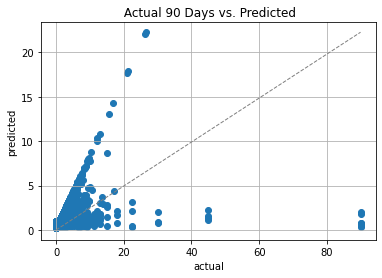

In [273]:
plt.scatter(summary_bgf["actual_90"],summary_bgf["predicted_purchases"])
plt.plot([0, max(summary_bgf["actual_90"])], [0, max(summary_bgf["predicted_purchases"])], color='gray', lw=1, linestyle='--')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title(' Actual 90 Days vs. Predicted')
plt.grid()
plt.show()

<AxesSubplot:xlabel='actual_90', ylabel='Count'>

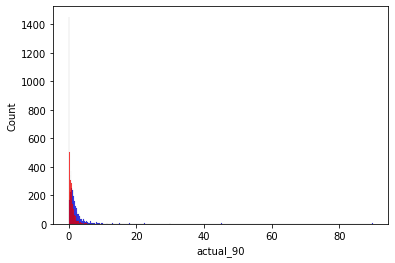

In [276]:
sns.histplot(summary_bgf["actual_90"],color='b')
sns.histplot(summary_bgf["predicted_purchases"],color='r')

# Gamma Gammar Model of Monetary Value

In [90]:
#estimate customer with frequency >0
returning_customers_summary = summary[summary["frequency"]>0]
print(returning_customers_summary.head())
print(len(returning_customers_summary))

   CustomerID  frequency  recency      T  monetary_value
1     12747.0        9.0    347.0  360.0      377.661111
2     12748.0      106.0    363.0  364.0      294.744811
3     12749.0        2.0    191.0  204.0     1209.360000
4     12820.0        2.0    282.0  317.0      280.765000
6     12822.0        1.0     17.0   78.0      257.980000
2429


In [91]:
returning_customers_summary[['monetary_value', 'frequency']].corr()

monetary_value  frequency
monetary_value        1.000000   0.106156
frequency             0.106156   1.000000

In [92]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2429 subjects, p: 2.22, q: 3.78, v: 492.46>


In [267]:
ggf.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    2.220744   0.129918         1.966105         2.475384
q    3.778287   0.170655         3.443804         4.112770
v  492.462140  48.137619       398.112407       586.811874

In [93]:
print(ggf.conditional_expected_average_profit(
        returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value']
    ).head(10))

1     379.610667
2     295.898351
3     895.455993
4     324.199426
6     333.372623
7     370.584555
9     267.087798
10    263.614409
11    218.009603
12    310.836584
dtype: float64


In [94]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value']
    ).mean(),
    returning_customers_summary[returning_customers_summary['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 402.47871687838773, Average profit: 394.2997141939112


In [95]:
# refit the BG model to the summary_with_money_value dataset 
bgf.fit(returning_customers_summary['frequency'], returning_customers_summary['recency'], returning_customers_summary['T'])
print(ggf.customer_lifetime_value( 
    bgf, #the model to use to predict the number of future transactions 
    returning_customers_summary['frequency'], 
    returning_customers_summary['recency'], 
    returning_customers_summary['T'], 
    returning_customers_summary['monetary_value'], time=3, # months 
    discount_rate=0.042 # monthly discount rate ~ 12.7% annually 
).head(10))

1      727.977794
2     5523.508720
3      923.622630
4      246.701940
6      369.182909
7      455.020263
9      328.529140
10     401.840526
11     376.053531
12      55.258534
Name: clv, dtype: float64


In [96]:
clv = ggf.customer_lifetime_value( 
    bgf, #
    returning_customers_summary['frequency'], 
    returning_customers_summary['recency'], 
    returning_customers_summary['T'], 
    returning_customers_summary['monetary_value'], time=3,
    discount_rate=0.042)

In [97]:
returning_customers_summary["CLV"] = clv

#Print the top 10 most valued customers
returning_customers_summary.sort_values('CLV', ascending=False).head(10)

CustomerID  frequency  recency      T  monetary_value           CLV
3746     18102.0       23.0    356.0  358.0     9663.103913  40203.292156
3282     17450.0       25.0    357.0  358.0     7638.382000  34476.490238
895      14096.0       15.0     90.0   92.0     3060.736000  19374.594697
3324     17511.0       25.0    357.0  364.0     3274.292800  14641.291586
2270     16029.0       37.0    335.0  364.0     1869.728919  12243.121727
2738     16684.0       14.0    347.0  349.0     4322.308571  11424.500829
615      13694.0       33.0    348.0  364.0     1850.495152  10867.041503
1757     15311.0       86.0    363.0  364.0      687.695930  10396.044982
3639     17949.0       25.0    354.0  362.0     2153.670400   9700.334308
2091     15769.0       20.0    341.0  362.0     2637.846000   9562.905558

# Time Splitting 90 days

In [98]:
#n_days = 90

n_days = 90

max_date = df_uk["InvoiceDate"].max()

cut_off = max_date - pd.to_timedelta(n_days,unit='d')

temp_in = df_uk[df_uk['InvoiceDate']<=cut_off]
temp_out = df_uk[df_uk["InvoiceDate"]>cut_off]

In [99]:
cut_off

Timestamp('2011-09-01 17:37:00')

In [100]:
#who customer will spend money after 90 days ?
temp_in = temp_in[["CustomerID","Quantity","TotalSales","InvoiceDate"]]
temp_out = temp_out[["CustomerID","Quantity","TotalSales","InvoiceDate"]]
target = temp_out.drop("Quantity",axis=1).groupby("CustomerID").sum().rename({"TotalSales":"spend_90_total"},axis=1)\
        .assign(spend_90_flag=1)

In [101]:
#make Recency (date) from data
max_date = temp_in["InvoiceDate"].max()

recency_feature = temp_in[["CustomerID","InvoiceDate"]] \
                    .groupby('CustomerID').apply(lambda x:(x["InvoiceDate"].max()-max_date) / pd.to_timedelta(1,"day")) \
                    .to_frame().set_axis(["recency"],axis=1)

In [102]:
recency_feature.head()

recency
CustomerID            
12346.0    -226.300694
12747.0     -10.275000
12748.0      -2.218056
12749.0     -31.183333
12820.0    -227.194444

In [103]:
#make frequency (count)

frequency_feature = temp_in[["CustomerID","InvoiceDate"]].groupby("CustomerID").agg({"InvoiceDate":lambda x:len(x.unique())}).set_axis(["frequency"],axis=1)

frequency_feature.head()

frequency
CustomerID           
12346.0             1
12747.0             8
12748.0           127
12749.0             3
12820.0             1

In [104]:
# make price (monetary)

price_feature = temp_in.groupby("CustomerID").agg({
    "TotalSales":["sum","mean"]
}).set_axis(["TotalSales_sum","TotalSales_mean"],axis=1)


price_feature.head()

TotalSales_sum  TotalSales_mean
CustomerID                                 
12346.0           77183.60     77183.600000
12747.0            2769.40        39.562857
12748.0           13083.83         6.651668
12749.0            2755.23        21.525234
12820.0             170.46        15.496364

In [105]:
#concat to be a new dataframe

features = pd.concat([recency_feature,frequency_feature,price_feature],axis=1).merge(target,
                                                                                     left_index=True,
                                                                                     right_index=True,
                                                                                     how="left").fillna(0)

features.head()

recency  frequency  TotalSales_sum  TotalSales_mean  \
CustomerID                                                           
12346.0    -226.300694          1        77183.60     77183.600000   
12747.0     -10.275000          8         2769.40        39.562857   
12748.0      -2.218056        127        13083.83         6.651668   
12749.0     -31.183333          3         2755.23        21.525234   
12820.0    -227.194444          1          170.46        15.496364   

            spend_90_total  spend_90_flag  
CustomerID                                 
12346.0               0.00            0.0  
12747.0             988.11            1.0  
12748.0           18164.07            1.0  
12749.0             522.59            1.0  
12820.0             561.53            1.0

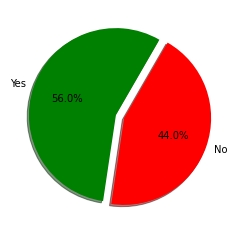

In [106]:
plt.pie(features["spend_90_flag"].value_counts(),labels=["Yes","No"],
       autopct="%1.1f%%",startangle =60,colors=["g","r"],shadow=True,explode=[0,0.1]);